# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_rows=None
from sklearn.utils import resample
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


## Reading the symptoms dataset

In [3]:
dfsym = pd.read_csv("D:2021VAERSSYMPTOMS.csv")
dfsym.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [3]:
dfsym.shape

(48110, 11)

In [4]:
dfsym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   SYMPTOM1         48110 non-null  object 
 2   SYMPTOMVERSION1  48110 non-null  float64
 3   SYMPTOM2         39351 non-null  object 
 4   SYMPTOMVERSION2  39351 non-null  float64
 5   SYMPTOM3         31542 non-null  object 
 6   SYMPTOMVERSION3  31542 non-null  float64
 7   SYMPTOM4         24444 non-null  object 
 8   SYMPTOMVERSION4  24444 non-null  float64
 9   SYMPTOM5         18560 non-null  object 
 10  SYMPTOMVERSION5  18560 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [5]:
dfsym.duplicated().any() # symptoms dataset does not have any duplicate data.

False

# Reading the vaccine dataset

In [6]:
dfvax = pd.read_csv("2021VAERSVAX.csv")
dfvax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [7]:
dfvax.shape

(34630, 8)

In [8]:
dfvax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [9]:
dfvax.duplicated().any() # vaccine dataset have duplicate data.

True

# Reading the demographic dataset

In [10]:
dfdata= pd.read_csv('2021VAERSDATA.csv', encoding_errors='ignore')
dfdata.head(3)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


In [11]:
dfdata.shape

(34121, 35)

In [12]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [13]:
dfdata.duplicated().any() # demographic dataset does not have any duplicate value

False

# DFSYM and DFVAX merging

In [14]:
# First we merged the symptoms and vaccine dataset.

In [15]:
df_symvax = pd.merge(dfsym, dfvax, on='VAERS_ID', how='inner', indicator= False)
df_symvax.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


# df_symvax and dfdata merging

In [16]:
# then we are merging the above obtained dataset with demographic dataset.

In [17]:
df_merged = pd.merge(df_symvax, dfdata, on='VAERS_ID', how= 'inner', indicator= False) 
df_merged.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [18]:
df_merged.shape # shape of the dataset after the final mergign.

(49021, 52)

# List of numerical and categorical columns

In [19]:
cat=[]
num=[]
for i in df_merged.columns:
    if df_merged[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)
        
    
print('the count of numerical variables are:-',len(num))  
print()
print('the count of categorical variables are:-',len(cat))
print()
print('the nummerical variables are:-',num)
print()
print('the categorical variables are:-',cat)

the count of numerical variables are:- 12

the count of categorical variables are:- 40

the nummerical variables are:- ['VAERS_ID', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'NUMDAYS', 'FORM_VERS']

the categorical variables are:- ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


# Finding the null data

In [20]:
# Counting the number of null value present in the each column. 
null_values = df_merged.isnull().sum()
null_values

VAERS_ID               0
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2            8901
SYMPTOMVERSION2     8901
SYMPTOM3           16822
SYMPTOMVERSION3    16822
SYMPTOM4           24005
SYMPTOMVERSION4    24005
SYMPTOM5           29975
SYMPTOMVERSION5    29975
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14957
VAX_DOSE_SERIES      101
VAX_ROUTE          11278
VAX_SITE           10464
VAX_NAME               0
RECVDATE               0
STATE               6828
AGE_YRS             3760
CAGE_YR             9911
CAGE_MO            48872
SEX                    0
RPT_DATE           48923
SYMPTOM_TEXT           2
DIED               45956
DATEDIED           46149
L_THREAT           46207
ER_VISIT           49006
HOSPITAL           39901
HOSPDAYS           42544
X_STAY             48936
DISABLE            47278
RECOVD              3583
VAX_DATE            1767
ONSET_DATE          2179
NUMDAYS             3789
LAB_DATA           23549
V_ADMINBY              0


In [21]:
# finding the percentage of null values respect to the length of the dataset.
# and showing the column which has more than 80% of missing data in them.
p = (null_values/df_merged.shape[0])*100
p[p>80]

CAGE_MO         99.696049
RPT_DATE        99.800086
DIED            93.747578
DATEDIED        94.141286
L_THREAT        94.259603
ER_VISIT        99.969401
HOSPITAL        81.395728
HOSPDAYS        86.787295
X_STAY          99.826605
DISABLE         96.444381
V_FUNDBY        99.798046
PRIOR_VAX       95.483568
BIRTH_DEFECT    99.847004
OFC_VISIT       82.199466
dtype: float64

In [22]:
df_merged.head(2)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""


# Removing 'unk' from the 'VAX_TYPE' and 'VAX_DOSE_SERIES'

In [23]:
df_merged['VAX_TYPE'].unique()

array(['COVID19', 'UNK', 'FLU4', 'DTAPHEPBIP', 'HIBV', 'RV1', 'FLUX',
       'HEP', 'MMR', 'VARZOS', 'DTAP', 'PPV', 'HPV9', 'CHOL', 'DT',
       'TTOX', 'FLU3', 'FLUC3', 'FLUC4', 'PNC13', 'FLUR4', 'MNQ', 'HPV4',
       'TDAP', 'FLUA3', 'HEPA', 'VARCEL', 'FLUA4', 'ANTH', 'IPV', 'TYP',
       'HPVX', 'DTP', 'DTAPIPVHIB', 'RV5', 'MENB', 'RAB', 'FLUN4', 'PNC',
       'OPV', 'YF'], dtype=object)

In [24]:
df_merged.drop(df_merged.index[df_merged['VAX_TYPE'] == 'UNK'], inplace=True)


In [25]:
df_merged['VAX_TYPE'].unique()

array(['COVID19', 'FLU4', 'DTAPHEPBIP', 'HIBV', 'RV1', 'FLUX', 'HEP',
       'MMR', 'VARZOS', 'DTAP', 'PPV', 'HPV9', 'CHOL', 'DT', 'TTOX',
       'FLU3', 'FLUC3', 'FLUC4', 'PNC13', 'FLUR4', 'MNQ', 'HPV4', 'TDAP',
       'FLUA3', 'HEPA', 'VARCEL', 'FLUA4', 'ANTH', 'IPV', 'TYP', 'HPVX',
       'DTP', 'DTAPIPVHIB', 'RV5', 'MENB', 'RAB', 'FLUN4', 'PNC', 'OPV',
       'YF'], dtype=object)

In [26]:
# Replacing null values in all symptomps coloumns:
df_merged['SYMPTOM2'] = df_merged['SYMPTOM2'].replace({np.nan: 'Not_Applicable'}) 
df_merged['SYMPTOM3'] = df_merged['SYMPTOM3'].replace({np.nan: 'Not_Applicable'}) 
df_merged['SYMPTOM4'] = df_merged['SYMPTOM4'].replace({np.nan: 'Not_Applicable'}) 
df_merged['SYMPTOM5'] = df_merged['SYMPTOM5'].replace({np.nan: 'Not_Applicable'}) 
df_merged['SYMPTOM_TEXT'] = df_merged['SYMPTOM_TEXT'].replace({np.nan: 'Not_Applicable'})

In [27]:
#dropping the individual symptom text columns
df_new = df_merged.drop(columns=['SYMPTOM_TEXT'], axis=1)

In [28]:
#df_new = df_merged.copy()

In [29]:
df_new.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,Not_Applicable,NaN,Not_Applicable,NaN,Not_Applicable,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,Not_Applicable,NaN,Not_Applicable,NaN,Not_Applicable,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,73.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,Not_Applicable,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,23.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,Not_Applicable,NaN,Not_Applicable,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,58.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,Not_Applicable,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,47.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [30]:
df_new.SYMPTOMVERSION1.value_counts()

23.1    35696
24.0    13169
Name: SYMPTOMVERSION1, dtype: int64

In [31]:
df_new.SYMPTOMVERSION2.value_counts()

23.1    29118
24.0    10883
Name: SYMPTOMVERSION2, dtype: int64

In [32]:
df_new.SYMPTOMVERSION3.value_counts()

23.1    23299
24.0     8794
Name: SYMPTOMVERSION3, dtype: int64

In [33]:
# as we can see 'SYMPTOMVERSION1', 'SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5' has less 
# variance in data, we can drop them 


In [34]:
df_new = df_new.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'], axis=1)

In [35]:
df_new.head(1)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom


# Combining ER_VISIT & ER_ED_VISIT variables

In [36]:
df_new['ER_VISIT'].value_counts()  # value counts of 'ER_VISIT' column.

Y    15
Name: ER_VISIT, dtype: int64

In [37]:
df_new['ER_ED_VISIT'].value_counts()  # value counts of 'ER_ED_VISIT' column.

Y    10306
Name: ER_ED_VISIT, dtype: int64

In [38]:
# Since the variables - 'ER_ED_VISIT' and 'ER_VISIT' represent same data, we are grouping the data into a single variable. 
# Replacing null values in 'ER_ED_VISIT' with values in 'ER_VISIT'.

df_new['ER_ED_VISIT']=df_new['ER_ED_VISIT'].fillna(df_new['ER_VISIT'])


In [39]:
#dropping the column 'ER_VISIT' as it has already been combined with 'ER_ED_VISIT' column.
df_new = df_new.drop('ER_VISIT',axis=1)

In [40]:
df_new['ER_ED_VISIT'].value_counts() # values has been mearged.

Y    10321
Name: ER_ED_VISIT, dtype: int64

# Replacing the null values  of died column and encoding the column.

In [41]:
df_new['DIED'].value_counts() # values in died column.

Y    3021
Name: DIED, dtype: int64

In [42]:
df_new['DIED'].isnull().sum() # the number of null values.

45844

In [43]:
df_new['DIED'] = df_new['DIED'].replace({np.nan: 'N'}) # Replacing the null values with N

In [44]:
df_new['DIED'].isnull().sum() # Checking the null values, and found none.

0

In [45]:
df_new['Num_DIED'] = pd.get_dummies(df_new.DIED, drop_first = True) # here 0 represents false and 1 represents true.

In [46]:
df_new.head(3)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,Num_DIED
0,916600,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom,0
1,916601,Anxiety,Dyspnoea,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,73.0,NaN,F,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy""",0
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,Not_Applicable,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,23.0,NaN,F,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish,0


# Replacing Null values as per DataUserGuide

In [47]:
# L_Threat - Replace 'nan' with 'N'
df_new['L_THREAT'] = df_new['L_THREAT'].replace({np.nan: 'N'})
# ER_ED_Visit - Replace 'nan' with 'N'
df_new['ER_ED_VISIT'] = df_new['ER_ED_VISIT'].replace({np.nan: 'N'}) 
# Ofc_Visit - Replace 'nan' with 'N'
df_new['OFC_VISIT'] = df_new['OFC_VISIT'].replace({np.nan: 'N'}) 
# Hospital - Replace 'nan' with 'N'
df_new['HOSPITAL'] = df_new['HOSPITAL'].replace({np.nan: 'N'}) 
# X_Stay - Replace 'nan' with 'N'
df_new['X_STAY'] = df_new['X_STAY'].replace({np.nan: 'N'})
# Disable - Replace 'nan' with 'N' 
df_new['DISABLE'] = df_new['DISABLE'].replace({np.nan: 'N'}) 
# Birth_Defect - Replace 'nan' with 'N'
df_new['BIRTH_DEFECT']=df_new['BIRTH_DEFECT'].replace({np.nan:'N'})
# Recovd - Replace 'nan' with 'U'
df_new['RECOVD'] = df_new['RECOVD'].replace({np.nan: 'U'})
# ALLERGIES - Replace 'nan' with 'N'
df_new['ALLERGIES'] = df_new['ALLERGIES'].replace({np.nan: 'N'})


In [48]:
df_new.isnull().sum() # checking the null value count for the data set 

VAERS_ID               0
SYMPTOM1               0
SYMPTOM2               0
SYMPTOM3               0
SYMPTOM4               0
SYMPTOM5               0
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14859
VAX_DOSE_SERIES      101
VAX_ROUTE          11191
VAX_SITE           10363
VAX_NAME               0
RECVDATE               0
STATE               6810
AGE_YRS             3743
CAGE_YR             9857
CAGE_MO            48726
SEX                    0
RPT_DATE           48767
DIED                   0
DATEDIED           46031
L_THREAT               0
HOSPITAL               0
HOSPDAYS           42418
X_STAY                 0
DISABLE                0
RECOVD                 0
VAX_DATE            1750
ONSET_DATE          2160
NUMDAYS             3762
LAB_DATA           23473
V_ADMINBY              0
V_FUNDBY           48766
OTHER_MEDS         17668
CUR_ILL            24084
HISTORY            14675
PRIOR_VAX          46651
SPLTTYPE           37640
FORM_VERS              0


# Replacing missing values in 'AGE_YRS' with corresponding values in 'CAGE_YR'

In [49]:
# Age in years (AGE_YRS): The recorded vaccinated individual's age in years.
# Age in years (CAGE_YR): Age of patient in years calculated by (vax_date- birth date) 

# Since AGE_YRS alone is sufficient for analysis, we will be dropping the 'CAGE_YR' variable. 
# But, before that, we impute the missing values in 'AGE_YRS' variable with it's corresponding values in 'CAGE_YR', if present.

In [50]:
df_new['AGE_YRS'].isnull().sum() # checking the null value count 

3743

In [51]:
df_new['AGE_YRS'] = df_new['AGE_YRS'].fillna(df_new['CAGE_YR'])

In [52]:
df_new['AGE_YRS'].isnull().sum() # after merging 'AGE_YRS' and 'CAGE_YR' column null value has decreased but not completely gone.

3273

In [53]:
# Dropping 'CAGE_YR' column.

df_new = df_new.drop(columns= ['CAGE_YR'],axis=1)

In [54]:
df_new['AGE_YRS'] = df_new['AGE_YRS'].fillna(df_new['AGE_YRS'].median()) # replacing the remaining null values by median.

In [55]:
df_new['AGE_YRS'].isnull().sum() # no null value find.

0

# DROPPING REDUNDANT COLUMNS

In [56]:
(df_new.isnull().sum()*100/len(df_new)).sort_values(ascending=False)

RPT_DATE           99.799447
V_FUNDBY           99.797401
CAGE_MO            99.715543
PRIOR_VAX          95.469150
DATEDIED           94.200348
HOSPDAYS           86.806508
SPLTTYPE           77.028548
CUR_ILL            49.286811
LAB_DATA           48.036427
OTHER_MEDS         36.156758
VAX_LOT            30.408268
HISTORY            30.031720
VAX_ROUTE          22.901873
VAX_SITE           21.207408
STATE              13.936355
NUMDAYS             7.698762
ONSET_DATE          4.420342
VAX_DATE            3.581295
TODAYS_DATE         0.579147
VAX_DOSE_SERIES     0.206692
FORM_VERS           0.000000
BIRTH_DEFECT        0.000000
V_ADMINBY           0.000000
OFC_VISIT           0.000000
ER_ED_VISIT         0.000000
ALLERGIES           0.000000
VAERS_ID            0.000000
HOSPITAL            0.000000
RECOVD              0.000000
VAX_NAME            0.000000
SYMPTOM2            0.000000
SYMPTOM3            0.000000
SYMPTOM4            0.000000
SYMPTOM5            0.000000
VAX_TYPE      

In [57]:
#we can drop the columns  ['RPT_DATE','V_FUNDBY','CAGE_MO','PRIOR_VAX','DATEDIED'] having null values more than 90%

In [58]:
#replace value to lowercase
df_new["CUR_ILL"] = df_new["CUR_ILL"].str.lower()


In [59]:
# Checking value counts for cur_ill
df_new["CUR_ILL"].value_counts(normalize=True).sort_values(ascending= False).head(30) * 100

none                   53.436100
no                      6.198297
unknown                 2.889310
none.                   1.029014
none known              0.794964
none reported           0.726363
n/a                     0.484242
uti                     0.343005
na                      0.338969
asthma                  0.266333
hypertension            0.242121
denies                  0.238086
sinus infection         0.205803
covid-19                0.189661
unk                     0.177555
seasonal allergies      0.157379
diabetes                0.149308
none noted              0.141237
no acute illnesses      0.137202
no illnesses            0.129131
blood pressure high     0.129131
0                       0.117025
nothing                 0.108954
migraines               0.104919
not known               0.092813
non                     0.088778
migraine                0.084742
covid 19                0.080707
hypothyroidism          0.076672
cough                   0.072636
Name: CUR_

In [60]:
df_new=df_new.replace(to_replace =["none.","no","unknown","none known","none reported","n/a","na","unk","none noted"
"no acute illnesses "                                                                   
"no illnesses "  ,                                                                       
"0"     ,                                                                              
"nothing ",                                                                              
"not known " ,                                                                          
"non" ,                                                                                   
"no"  ,                                                                                  
"no known illness."  ,                                                                    
"no acute illness" ,                                                                    
"no known" ,                                                                             
"none known."  ,                                                                                                                                                             
"no illness" ,                                                                            
"none listed " ,                                                                         
"unknown.","none","NaN","none listed","no.","not known","nothing","0","no illnesses","no acute illnesses","none noted"],value="n")                                                                             


In [61]:
df_new["CUR_ILL"].value_counts(normalize=True).sort_values(ascending= False).head(10) * 100

n                      67.394375
uti                     0.343005
asthma                  0.266333
hypertension            0.242121
denies                  0.238086
sinus infection         0.205803
covid-19                0.189661
seasonal allergies      0.157379
diabetes                0.149308
blood pressure high     0.129131
Name: CUR_ILL, dtype: float64

In [62]:
#we can drop CUR_ILL columns as majority of the records gives no information about the illness

In [63]:
# Checking value counts for Allergies
df_new["ALLERGIES"].value_counts(normalize=True).sort_values(ascending= False).head(50) * 100

N                          41.367032
None                        9.237696
n                           5.822163
NKA                         1.980968
NKDA                        1.880692
No                          1.092807
Penicillin                  1.080528
Sulfa                       0.712166
No known allergies          0.712166
NONE                        0.474777
Unknown                     0.450220
None known                  0.388826
nka                         0.341758
penicillin                  0.327433
PCN                         0.284457
sulfa                       0.243528
None.                       0.221017
Codeine                     0.212831
Latex                       0.208738
no known allergies          0.206692
Amoxicillin                 0.196460
Sulfa drugs                 0.184181
nkda                        0.184181
None reported               0.159623
Shellfish                   0.147345
Bactrim                     0.126880
N/a                         0.122787
c

In [64]:
df_new=df_new.replace(to_replace =['N',                          
'None',                        
'n'                          
'NKA',                         
'NKDA'                       
'No' ,
'No known allergies',
'NONE',                        
'Unknown',                     
'None known',                 
'nka', 'None.','no known allergies','Nkda',                        
'No known allergies.','No allergies','UNKNOWN ' ,'NO','No known drug allergies','Nka','NKMA '] , value ="n")                                                                             

In [65]:
df_new["ALLERGIES"].value_counts(normalize=True).sort_values(ascending= False).head(50) * 100

n                     59.699171
NKA                    1.980968
NKDA                   1.880692
No                     1.092807
Penicillin             1.080528
Sulfa                  0.712166
penicillin             0.327433
PCN                    0.284457
sulfa                  0.243528
Codeine                0.212831
Latex                  0.208738
Amoxicillin            0.196460
nkda                   0.184181
Sulfa drugs            0.184181
None reported          0.159623
Shellfish              0.147345
Bactrim                0.126880
N/a                    0.122787
codeine                0.114601
No Known Allergies     0.112555
Morphine               0.104369
Aspirin                0.100276
Lisinopril             0.092090
lactose                0.090044
Erythromycin           0.079812
UNKNOWN                0.079812
shellfish              0.075719
latex                  0.071626
Augmentin              0.067533
PENICILLIN             0.067533
sulfa drugs            0.063440
seasonal

In [66]:
#we can drop ALLERGIES column as the majority of the records gives no information about the allergies

In [67]:
# as there are lot of age entries we are categorizing the age into groups for our benefit. 
df_new.loc[((df_new['AGE_YRS'] >= 0) & (df_new['AGE_YRS'] <= 12)), 'AGE_GROUP'] = 'Child'
df_new.loc[((df_new['AGE_YRS'] > 12) & (df_new['AGE_YRS'] <= 18)), 'AGE_GROUP'] = 'Teenage'
df_new.loc[((df_new['AGE_YRS'] > 18) & (df_new['AGE_YRS'] <= 30)), 'AGE_GROUP'] = 'Young_Adult'
df_new.loc[((df_new['AGE_YRS'] > 30) & (df_new['AGE_YRS'] <= 59)), 'AGE_GROUP'] = 'Senior_Adult'
df_new.loc[df_new['AGE_YRS'] > 59, 'AGE_GROUP'] = 'Senior_Citizen'

df_new['AGE_GROUP'].value_counts()

Senior_Adult      27324
Senior_Citizen    15636
Young_Adult        5498
Teenage             271
Child               136
Name: AGE_GROUP, dtype: int64

In [68]:
#we can drop AGE_YRS column as AGE_GROUP column is already there

In [69]:
df_new=df_new.drop(columns=['RPT_DATE','V_FUNDBY','CAGE_MO','PRIOR_VAX','DATEDIED','CUR_ILL','ALLERGIES'],axis=1)
#DROPPING INSIG FEATURES

In [70]:
df_new.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,OTHER_MEDS,HISTORY,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,Num_DIED,AGE_GROUP
0,916600,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,F,n,n,n,NaN,n,n,Y,12/28/2020,12/30/2020,2.0,n,PVT,n,n,NaN,2,01/01/2021,n,Y,n,0,Senior_Adult
1,916601,Anxiety,Dyspnoea,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,n,n,n,NaN,n,n,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,2,01/01/2021,n,Y,n,0,Senior_Citizen
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,Not_Applicable,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,F,n,n,n,NaN,n,n,U,12/31/2020,12/31/2020,0.0,NaN,SEN,n,n,NaN,2,01/01/2021,n,n,Y,0,Young_Adult
3,916603,Dizziness,Fatigue,Mobility decreased,Not_Applicable,Not_Applicable,COVID19,MODERNA,n,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,F,n,n,n,NaN,n,n,Y,12/23/2020,12/23/2020,0.0,n,WRK,n,"diverticulitis, mitral valve prolapse, osteoar...",NaN,2,01/01/2021,n,n,n,0,Senior_Adult
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,Not_Applicable,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,F,n,n,n,NaN,n,n,n,12/22/2020,12/29/2020,7.0,NaN,PUB,Na,NaN,NaN,2,01/01/2021,n,n,n,0,Senior_Adult


In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48865 entries, 0 to 49020
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48865 non-null  int64  
 1   SYMPTOM1         48865 non-null  object 
 2   SYMPTOM2         48865 non-null  object 
 3   SYMPTOM3         48865 non-null  object 
 4   SYMPTOM4         48865 non-null  object 
 5   SYMPTOM5         48865 non-null  object 
 6   VAX_TYPE         48865 non-null  object 
 7   VAX_MANU         48865 non-null  object 
 8   VAX_LOT          34006 non-null  object 
 9   VAX_DOSE_SERIES  48764 non-null  object 
 10  VAX_ROUTE        37674 non-null  object 
 11  VAX_SITE         38502 non-null  object 
 12  VAX_NAME         48865 non-null  object 
 13  RECVDATE         48865 non-null  object 
 14  STATE            42055 non-null  object 
 15  AGE_YRS          48865 non-null  float64
 16  SEX              48865 non-null  object 
 17  DIED        

In [72]:
print(df_new['SYMPTOM1'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM2'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM3'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM4'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM5'].value_counts(ascending=False).head(5))


Chills                     3264
Arthralgia                 1956
Headache                   1488
Dizziness                  1459
Injection site erythema    1416
Name: SYMPTOM1, dtype: int64
Not_Applicable    8864
Headache          2203
Fatigue           1749
Chills            1539
Pyrexia           1061
Name: SYMPTOM2, dtype: int64
Not_Applicable    16772
Headache           1829
Pyrexia            1288
Fatigue            1213
Pain               1193
Name: SYMPTOM3, dtype: int64
Not_Applicable    23934
Pyrexia            1321
Headache           1192
Pain               1104
Nausea              977
Name: SYMPTOM4, dtype: int64
Not_Applicable    29883
Pyrexia            1189
Pain                860
Nausea              669
Headache            612
Name: SYMPTOM5, dtype: int64


# Univariate analysis

## Count plot for vax_type

In [73]:
df_new['VAX_TYPE'].value_counts()

COVID19       48338
VARZOS          154
FLU4             72
FLUX             68
PPV              43
HEP              22
MMR              16
PNC13            14
FLUR4            12
TDAP             10
FLUA4             9
HPV9              9
VARCEL            8
HEPA              8
MNQ               8
FLU3              7
HPVX              6
FLUC4             5
HPV4              5
DTAP              5
MENB              5
FLUA3             4
HIBV              4
DTAPHEPBIP        4
DT                3
RV1               3
DTAPIPVHIB        3
OPV               2
FLUN4             2
YF                2
TYP               2
IPV               2
FLUC3             2
TTOX              2
DTP               1
RV5               1
RAB               1
CHOL              1
PNC               1
ANTH              1
Name: VAX_TYPE, dtype: int64

<AxesSubplot:>

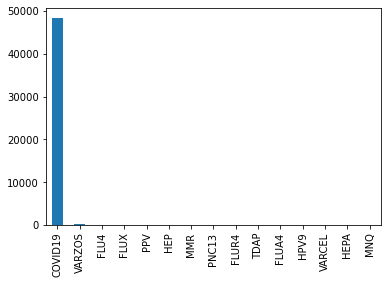

In [74]:
df_new['VAX_TYPE'].value_counts(sort=True).nlargest(15).plot.bar() #Plot vaccine type top 15

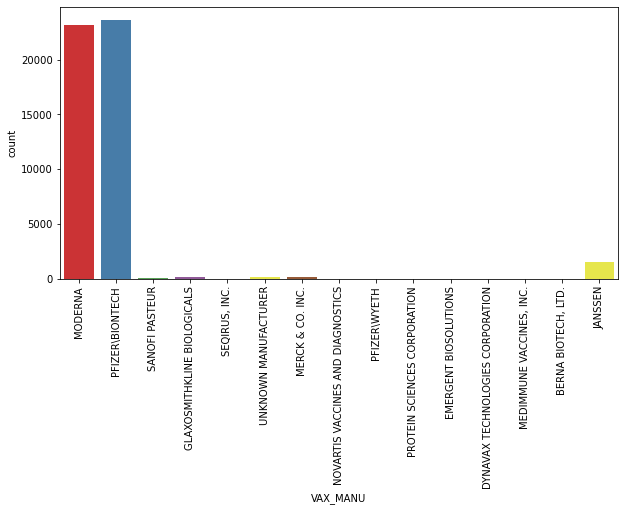

In [75]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_new,
    x='VAX_MANU',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
None

In [76]:
# most of the vaccines are of covid 19 type. and  Most of the people have taken Pfizer (Covid -19 vaccine)  followed by 
# Moderna and Janssen.

## pie plot of gender

In [77]:
df_new['SEX'].value_counts()

F    35119
M    12750
U      996
Name: SEX, dtype: int64

<AxesSubplot:ylabel='None'>

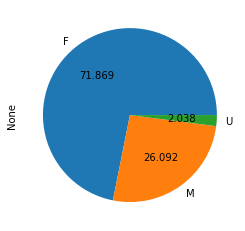

In [78]:
df_new.groupby('SEX').size().plot(kind='pie',autopct='%.3f')

In [79]:
# most of the data entries are for females.

## Pie plot of recovery data

In [80]:
df_new['RECOVD'].value_counts()

n    20120
Y    16683
U    12062
Name: RECOVD, dtype: int64

<AxesSubplot:ylabel='None'>

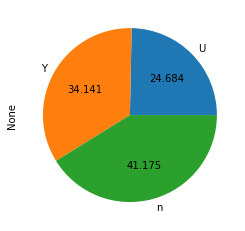

In [81]:
df_new.groupby('RECOVD').size().plot(kind='pie',autopct='%.3f')

In [82]:
# from the above plot we can see not yet recovered percentage is high.

## Pie plot of died data

In [83]:
df_new['DIED'].value_counts()

n    45844
Y     3021
Name: DIED, dtype: int64

<AxesSubplot:ylabel='None'>

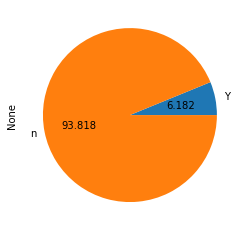

In [84]:
df_new.groupby('DIED').size().plot(kind='pie',autopct='%.3f')

In [85]:
# percentage of dead is less than not dead by a large margin.

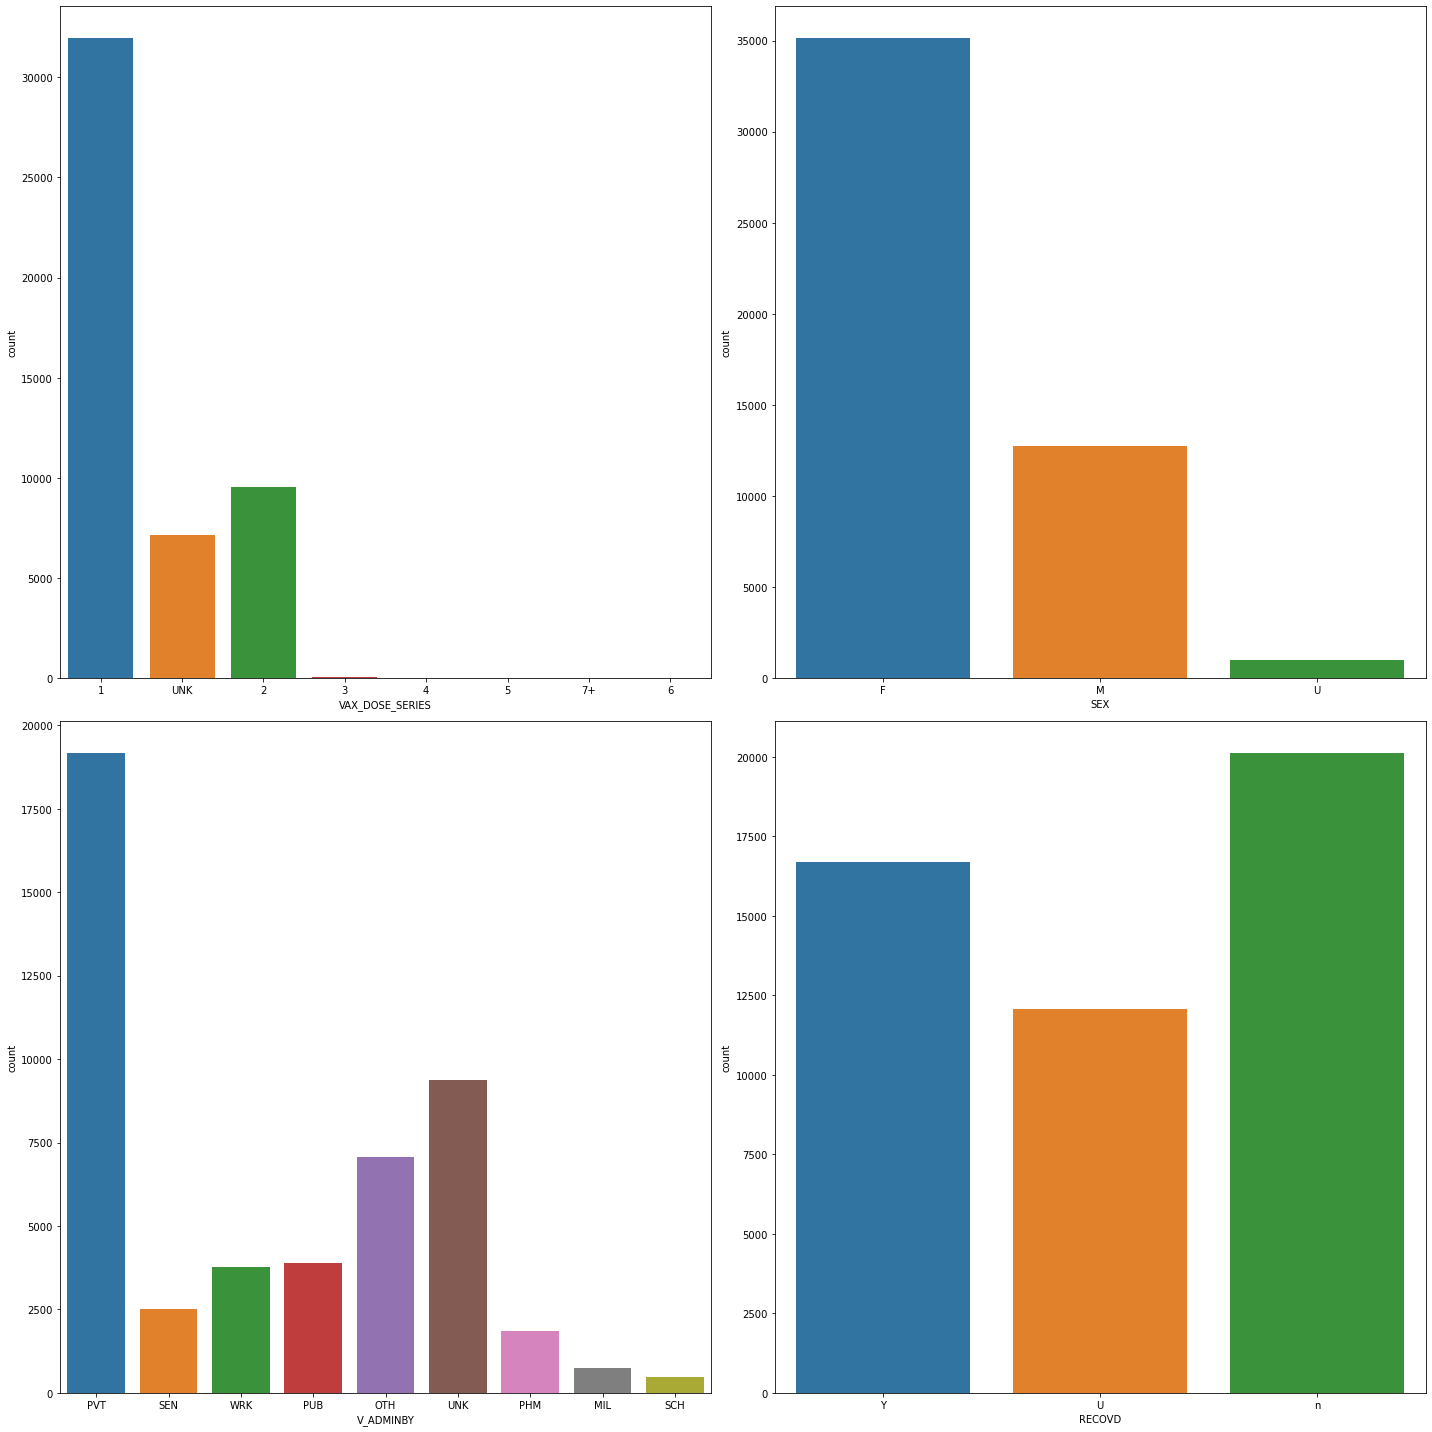

In [86]:
# Plotting between dose , sex, Admistered and recovered
fig, ax= plt.subplots(2,2,figsize= (20,20))

col= ['VAX_DOSE_SERIES', 'SEX', 'V_ADMINBY', 'RECOVD']

for i,subplot in zip(col,ax.flatten()): 
    sns.countplot(x= df_new[i], ax= subplot)
    plt.tight_layout()

In [87]:
## From this plot we can conclude that many of the vaccine doses are given  at the Private places. 
# SCH(School) place shows the least number vaccine given
## Most of the people have taken only 1 doses for all the vaccine.
## This plot shows the high count of people who have not yet recovered.

# Bivariate analysis

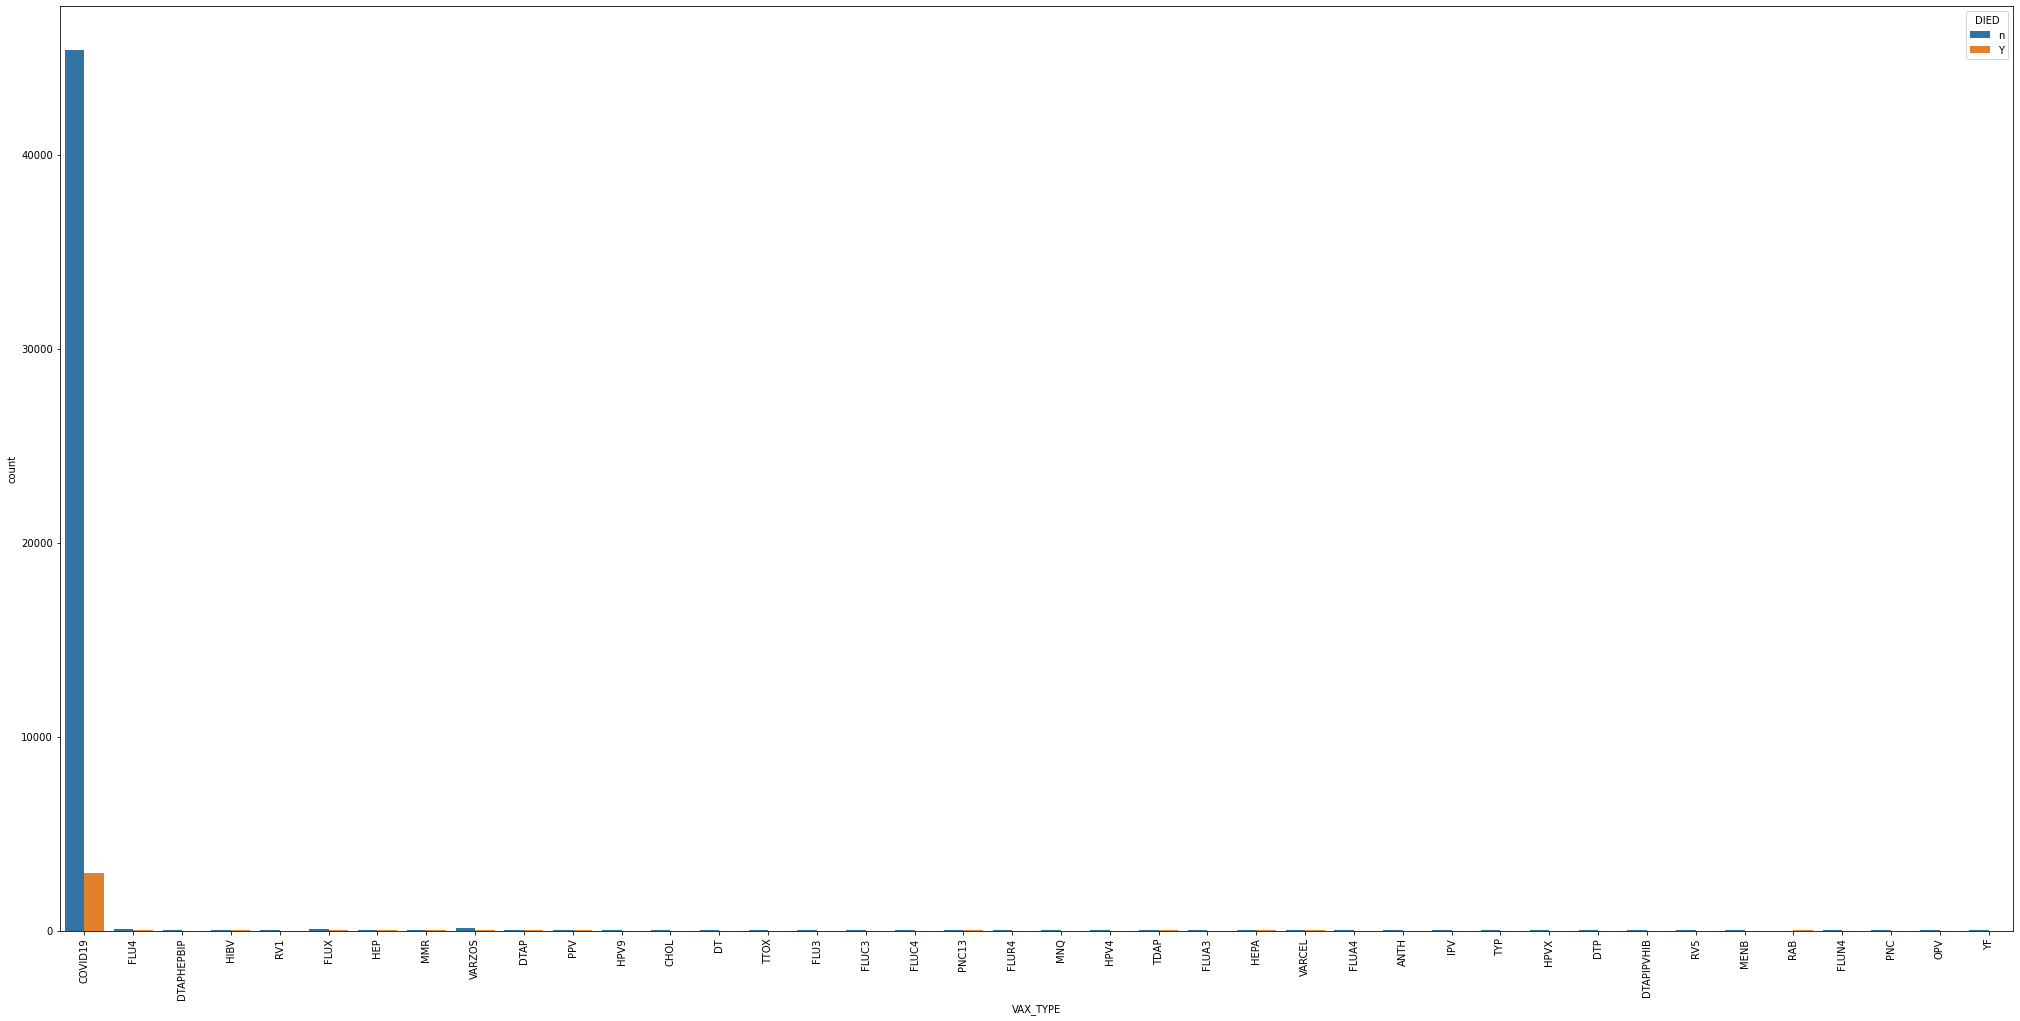

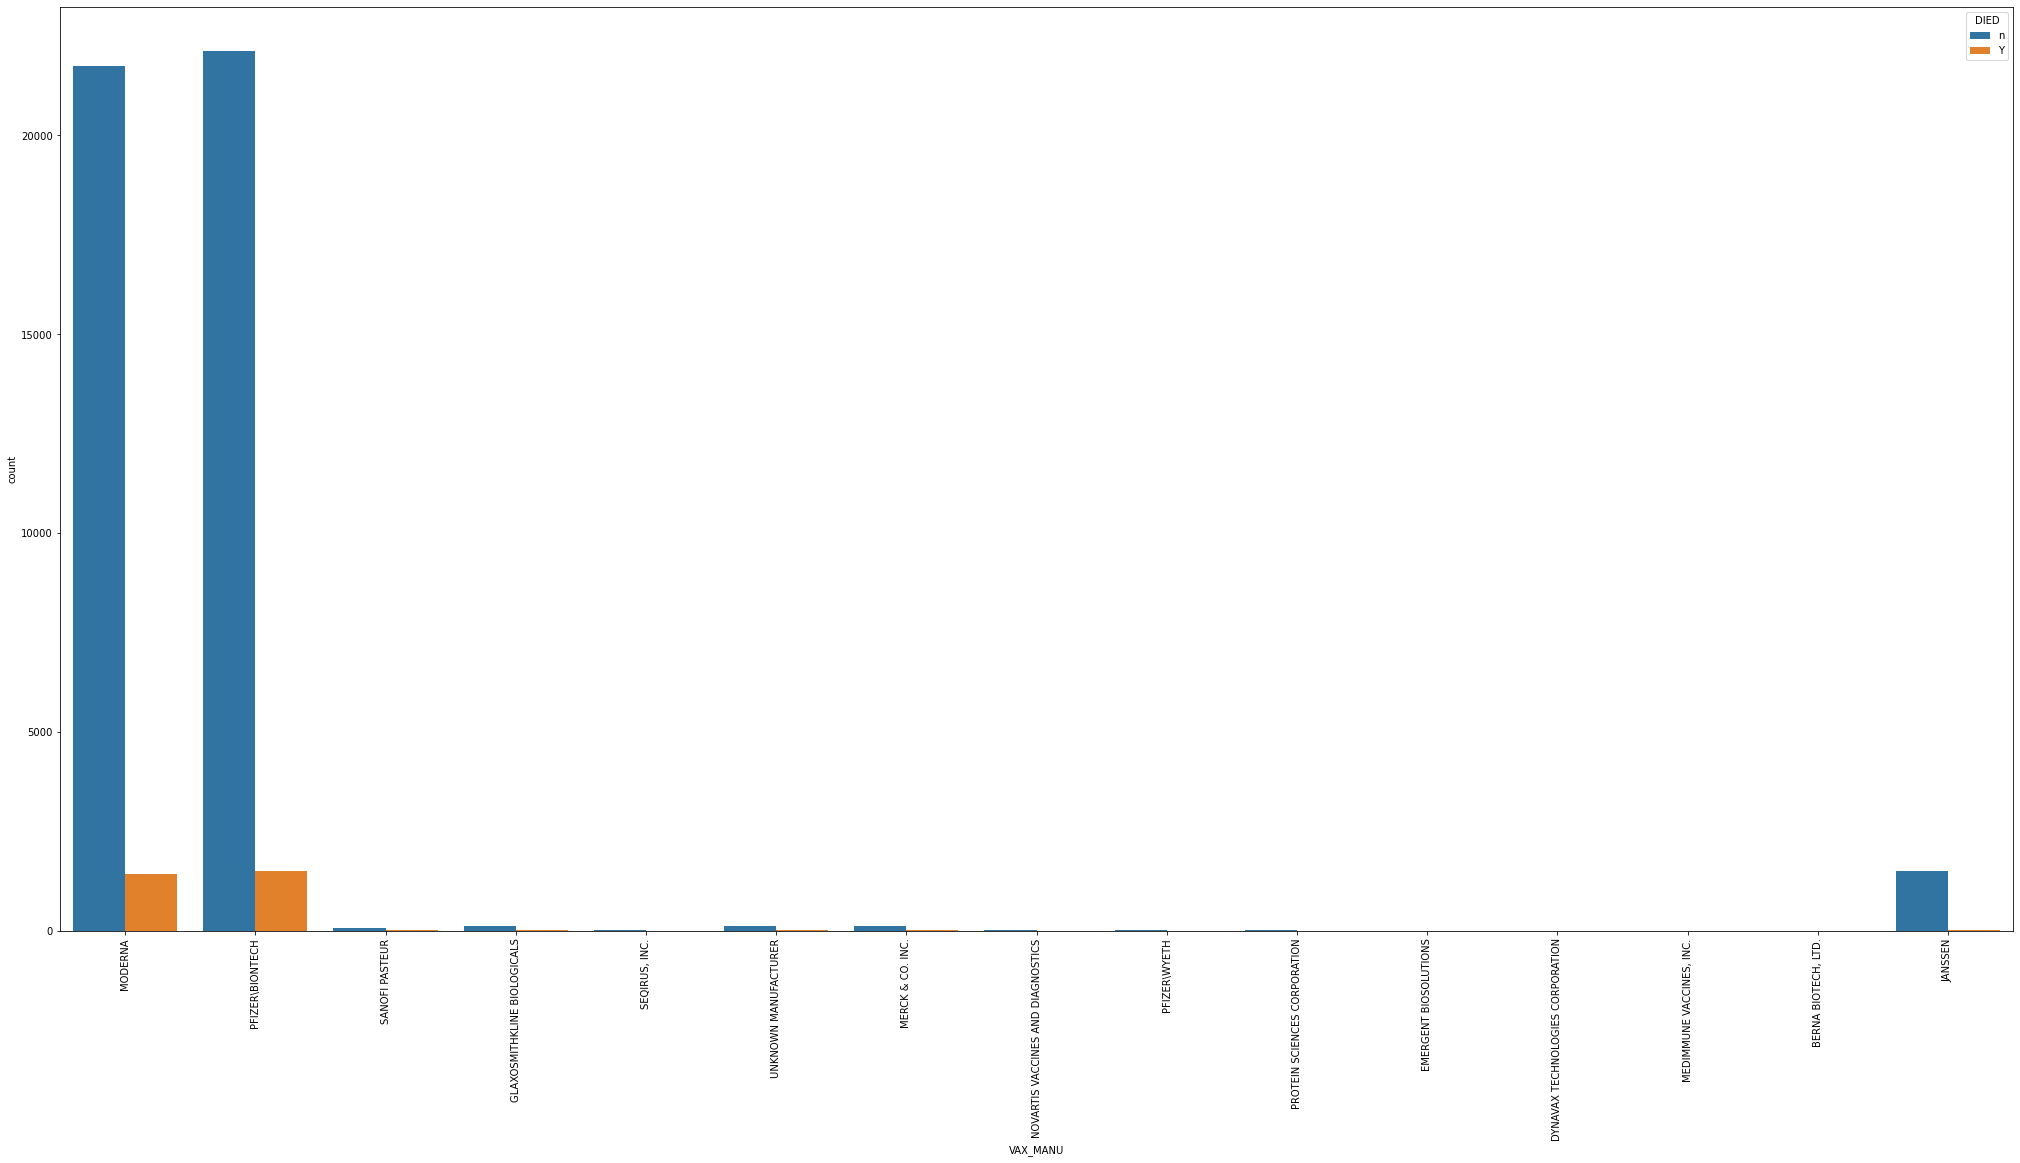

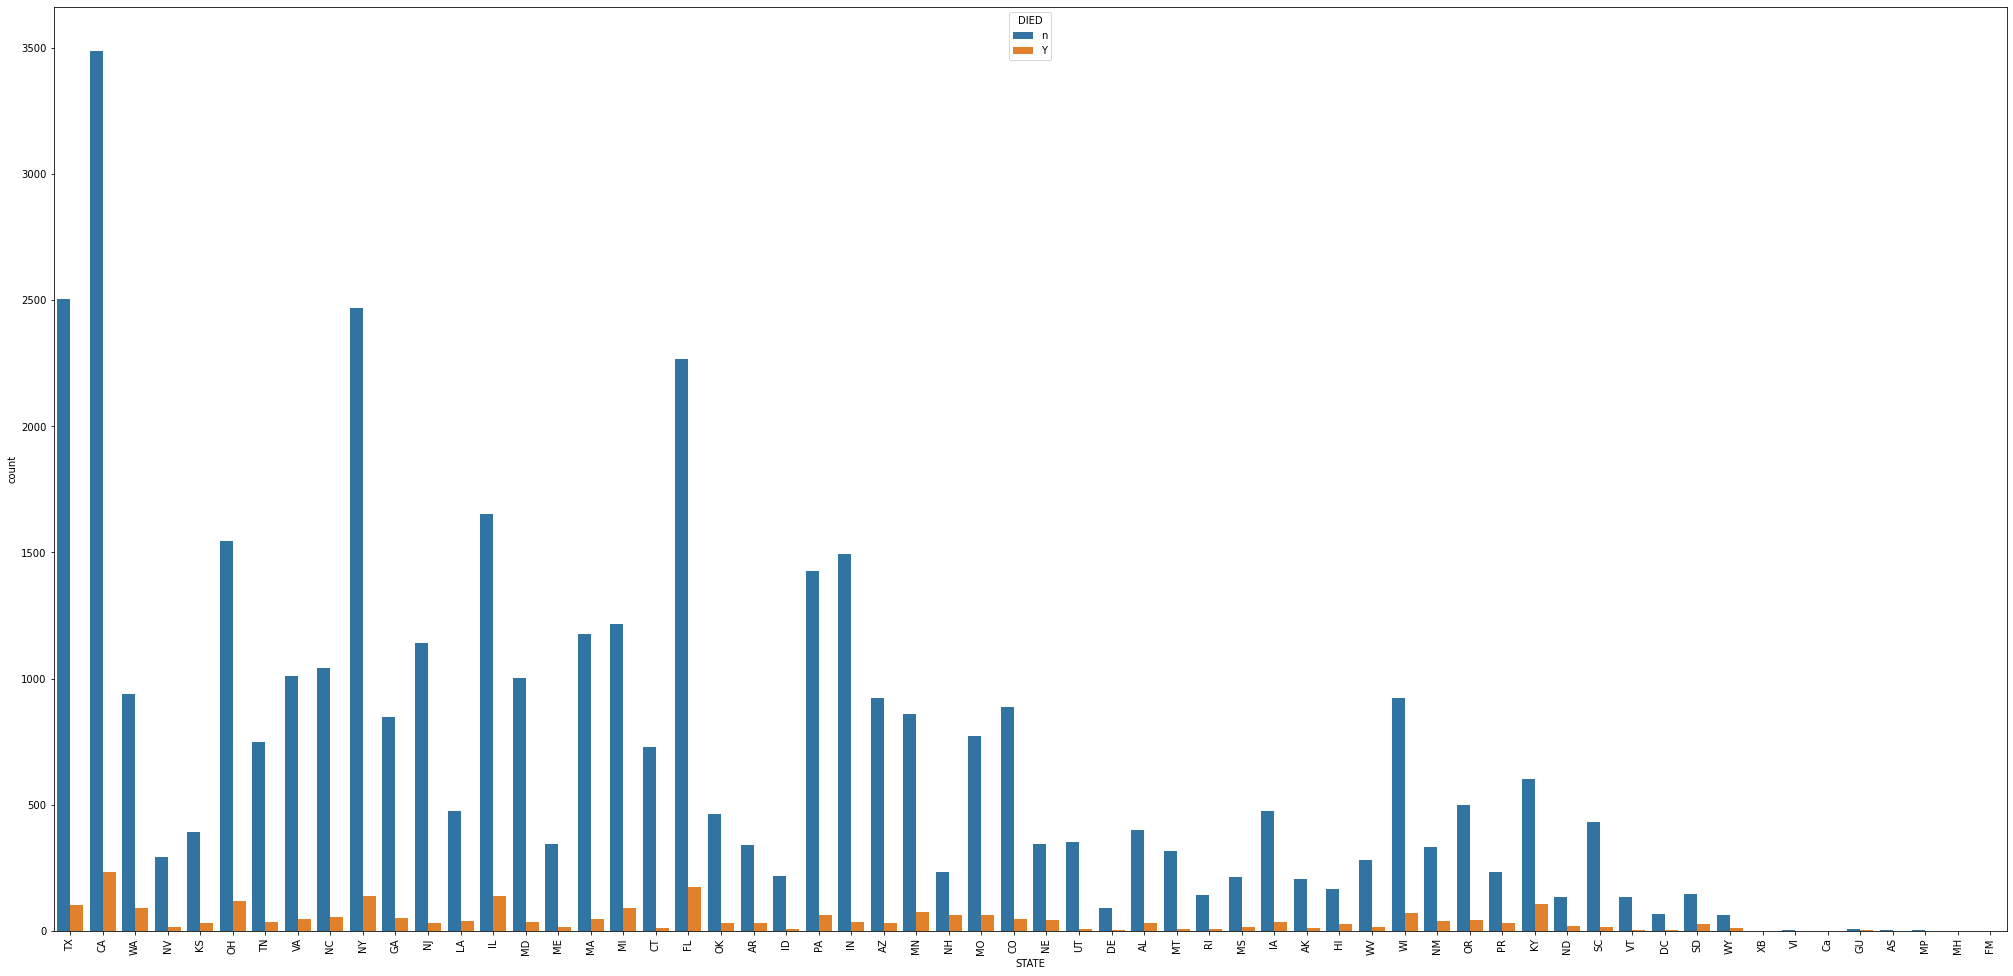

In [88]:
col1= ['VAX_TYPE', 'VAX_MANU', 'STATE']

for i in col1: 
    plt.figure(figsize=(35,17))
    sns.countplot(x= df_new[i], hue= df_new['DIED'])
    plt.xticks(rotation= 90)
    plt.show()

In [89]:
## For the first graph we come to know that since the covid 19 vaccine is mostly used its shows that mostly 98% 
# of the people have survived after taking the vaccine.  While the other 2 % have not survived.
## In the second Bivarient graph Most of the people have taken 
# Pfizer( Covid -19 ) where the survival rate is high followed by Moderna and Janssen.
## For state CA shows the highest number of vaccines taken followed by TX.

## Heatmap of the dataset

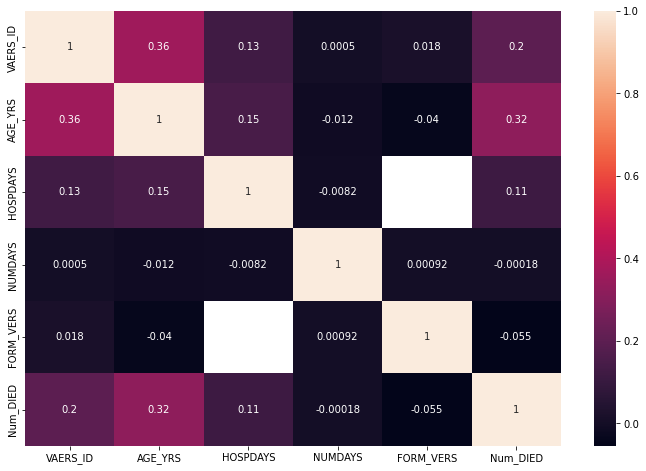

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot= True)
plt.show()

In [91]:
# 'CAGE_MO' and 'FORM_VERS' does not have any correlation betweeen them.
# 'HOSPDAYS' and 'FORM_VERS' does not have any correlation betweeen them.

In [92]:
# other variables have correlation between them.

## Plotting gender proportion where Vaccine is admistered

In [93]:
tab= (pd.crosstab(df_new['SEX'], df_new['V_ADMINBY']) / df_new['V_ADMINBY'].value_counts()) * 100
tab.reset_index()

,SEX,MIL,OTH,PHM,PUB,PVT,SCH,SEN,UNK,WRK
0,F,51.470588,66.643059,71.443966,71.762590,75.446009,73.717949,67.499009,65.899648,85.429407
1,M,48.128342,32.691218,26.724138,27.646454,24.074074,25.854701,31.787554,25.982742,14.171763
2,U,0.401070,0.665722,1.831897,0.590956,0.479917,0.427350,0.713436,8.117609,0.398830


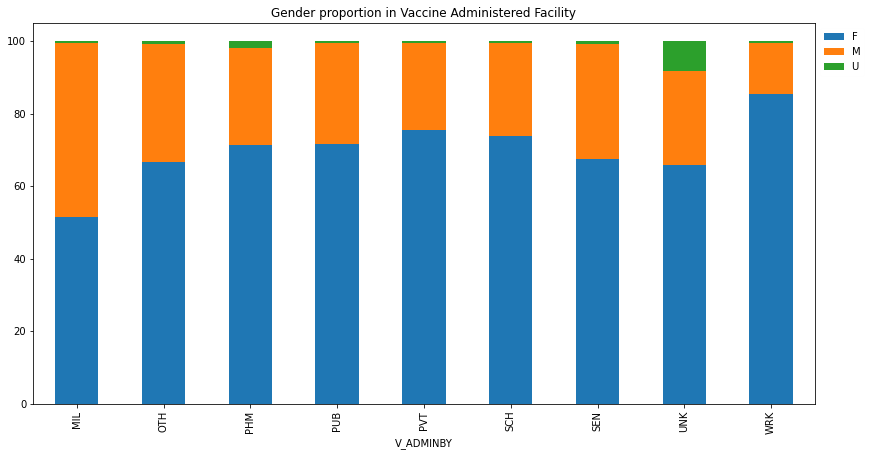

In [94]:
(tab.T).plot(kind= 'bar', stacked= True, figsize= (14,7))
plt.legend(framealpha= 0.01, bbox_to_anchor= (1,0,0,1))
plt.xlabel('V_ADMINBY')
plt.title('Gender proportion in Vaccine Administered Facility')
plt.show()

In [95]:
# In this Graph Most of the females (85%) have  the vaccine dose in their WorkPlace Clinic( WRK) followed by Private.    
# For the males most of the vaccine is Admistered at Millitary (48%) 
# and the leat place where it is Admistered is Workplace clinic( WRK)

## Gender vs Vaccine type plot

In [96]:
tab1= (pd.crosstab(df_new['SEX'], df_new['VAX_TYPE']) / df_new['VAX_TYPE'].value_counts()) * 100
tab1.reset_index()

,SEX,ANTH,CHOL,COVID19,DT,DTAP,DTAPHEPBIP,DTAPIPVHIB,DTP,FLU3,FLU4,FLUA3,FLUA4,FLUC3,FLUC4,FLUN4,FLUR4,FLUX,HEP,HEPA,HIBV,HPV4,HPV9,HPVX,IPV,MENB,MMR,MNQ,OPV,PNC,PNC13,PPV,RAB,RV1,RV5,TDAP,TTOX,TYP,VARCEL,VARZOS,YF
0,F,0.0,100.0,72.086143,100.0,100.0,25.0,33.333333,100.0,85.714286,37.500000,75.0,100.0,100.0,100.0,100.0,75.0,55.882353,40.909091,0.0,25.0,0.0,77.777778,100.0,50.0,60.0,18.75,75.0,100.0,0.0,35.714286,81.395349,0.0,0.0,0.0,60.0,50.0,0.0,12.5,47.402597,100.0
1,M,100.0,0.0,25.996111,0.0,0.0,75.0,33.333333,0.0,0.000000,54.166667,25.0,0.0,0.0,0.0,0.0,25.0,29.411765,59.090909,100.0,75.0,100.0,22.222222,0.0,50.0,20.0,81.25,12.5,0.0,0.0,57.142857,11.627907,100.0,100.0,100.0,20.0,50.0,50.0,87.5,25.974026,0.0
2,U,0.0,0.0,1.917746,0.0,0.0,0.0,33.333333,0.0,14.285714,8.333333,0.0,0.0,0.0,0.0,0.0,0.0,14.705882,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.00,12.5,0.0,100.0,7.142857,6.976744,0.0,0.0,0.0,20.0,0.0,50.0,0.0,26.623377,0.0


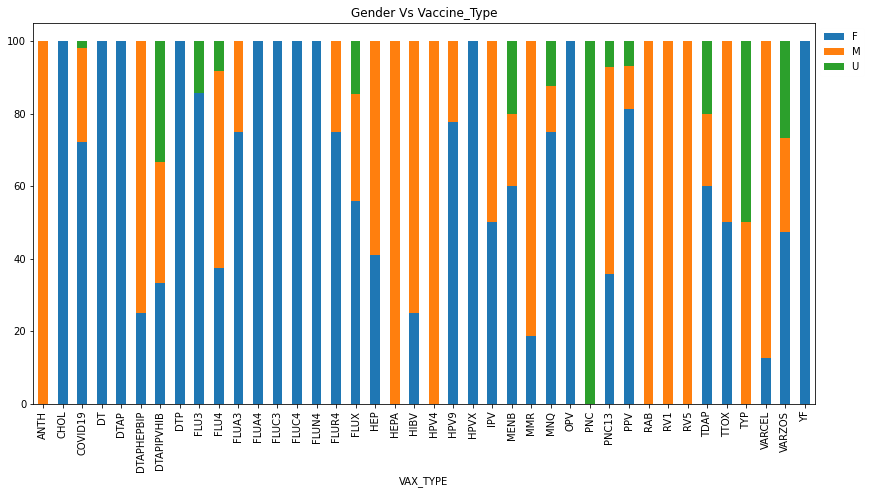

In [97]:
(tab1.T).plot(kind= 'bar', stacked= True, figsize= (14,7))
plt.legend(framealpha= 0.01, bbox_to_anchor= (1,0,0,1))
plt.xlabel('VAX_TYPE')
plt.title('Gender Vs Vaccine_Type')
plt.show()

In [98]:
# In this plot 100 percentage of the females are given DT( Diphthera vaccine) followed by FLU . 
# The covid vaccine is taken by 72% of the females . 
# For the males 100% male population have taken  HEPA( Hepatitis ) vaccine and 25 % for covid 19 vaccine .

## 'ER_ED_VISIT' vs 'Num_DIED' plot

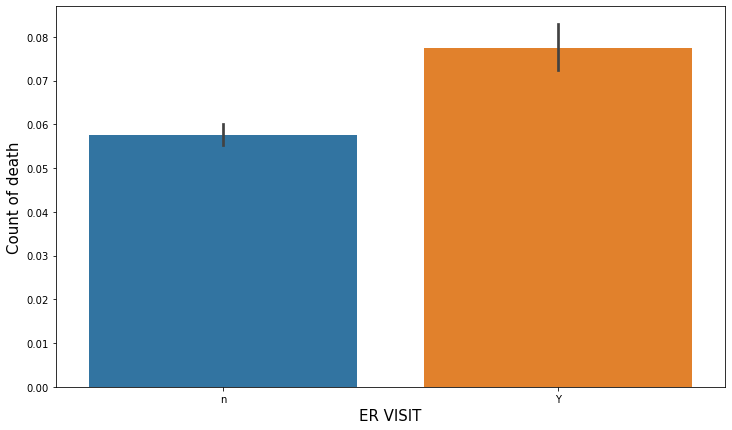

In [99]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'ER_ED_VISIT', y= 'Num_DIED',data= df_new)
plt.xlabel('ER VISIT', fontsize =15)
plt.ylabel('Count of death', fontsize = 15)
plt.show()

In [100]:
# number of er visited person's death is high.

## 'AGE_GROUP' vs 'Num_DIED' plot

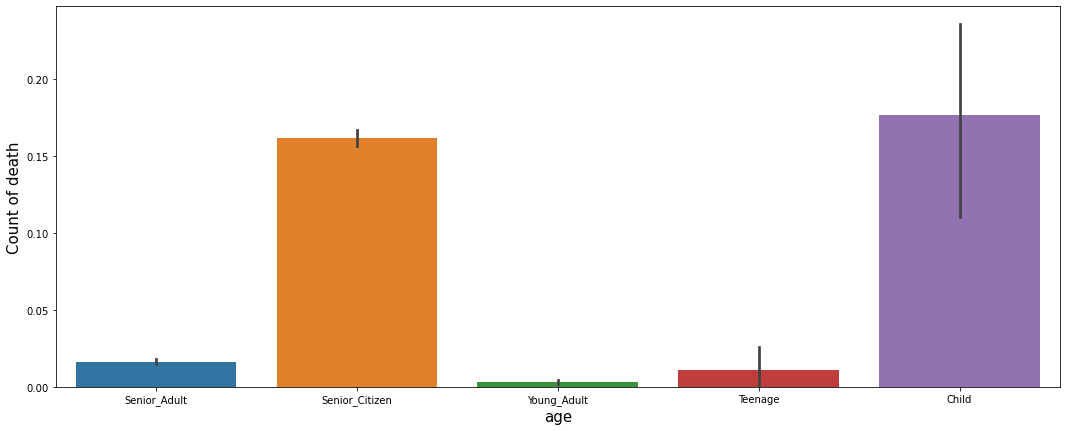

In [101]:
plt.figure(figsize=(18,7))
sns.barplot(x= 'AGE_GROUP', y= 'Num_DIED',data= df_new)
plt.xlabel('age', fontsize =15)
plt.ylabel('Count of death', fontsize = 15)
plt.show()

In [102]:
# most of the death has happened from child age group.

# Multivariate analysis

## 'Num_DIED' vs 'AGE_YRS' plot

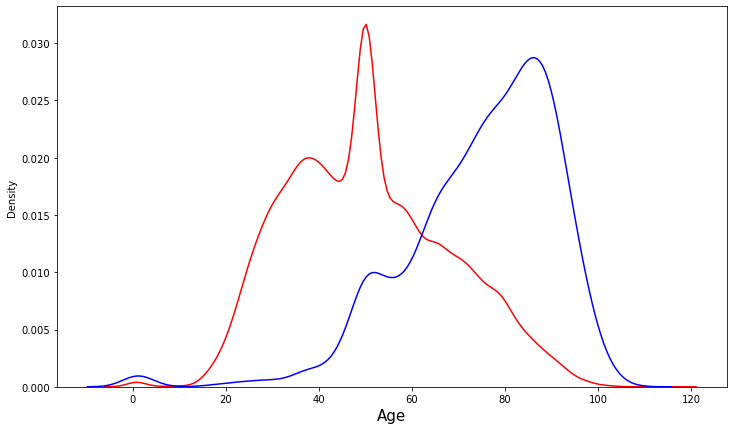

In [103]:
plt.figure(figsize=(12,7))
sns.distplot(df_new[df_new['Num_DIED'] ==0]['AGE_YRS'] , hist=False,color= 'red')  #( not dead)
sns.distplot(df_new[df_new['Num_DIED'] ==1]['AGE_YRS'] , hist=False,color= 'blue')  #( dead)
plt.xlabel("Age",fontsize = 15)
plt.show()

In [104]:
# The red curve which shows the age of the people who have not DIED is almost normally distributed 
# The blue curve which shows the age of the people who have DIED is showing extreme values in the data (left skewed)

## 'SEX' vs 'AGE_YRS' plot

<Figure size 936x504 with 0 Axes>

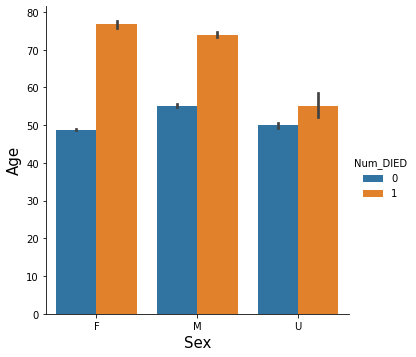

In [105]:
plt.figure(figsize=(13,7))
sns.catplot(x = 'SEX',y='AGE_YRS',data=df_new, hue='Num_DIED',kind='bar')
plt.ylabel("Age",fontsize = 15)
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [106]:
# Female contains a large anount the datapoints. There is also a significant portion af unknown datapoints.
# most of the elderly female are dead. 

## 'RECOVD' vs 'AGE_YRS' plot

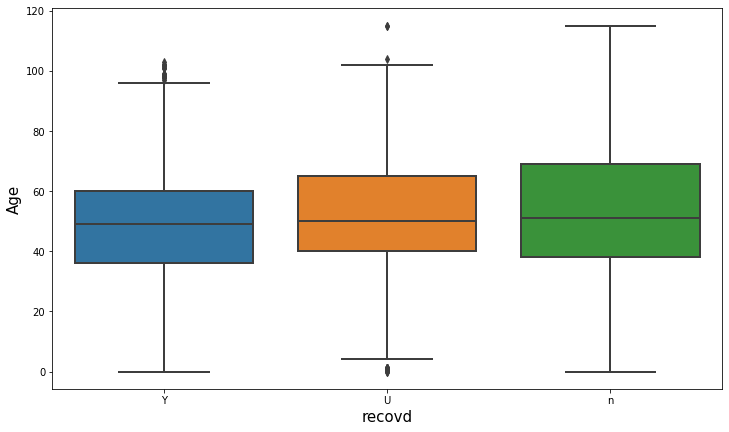

In [107]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'RECOVD',y= 'AGE_YRS',data= df_new,linewidth=2)
plt.ylabel("Age",fontsize = 15)
plt.xlabel("recovd",fontsize = 15)
plt.show()

In [108]:
# there are some outliers present in the data after age 90.

# SYMPTOMS ANALYSIS

In [109]:
print(df_new['SYMPTOM1'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM2'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM3'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM4'].value_counts(ascending=False).head(5))
print(df_new['SYMPTOM5'].value_counts(ascending=False).head(5))


Chills                     3264
Arthralgia                 1956
Headache                   1488
Dizziness                  1459
Injection site erythema    1416
Name: SYMPTOM1, dtype: int64
Not_Applicable    8864
Headache          2203
Fatigue           1749
Chills            1539
Pyrexia           1061
Name: SYMPTOM2, dtype: int64
Not_Applicable    16772
Headache           1829
Pyrexia            1288
Fatigue            1213
Pain               1193
Name: SYMPTOM3, dtype: int64
Not_Applicable    23934
Pyrexia            1321
Headache           1192
Pain               1104
Nausea              977
Name: SYMPTOM4, dtype: int64
Not_Applicable    29883
Pyrexia            1189
Pain                860
Nausea              669
Headache            612
Name: SYMPTOM5, dtype: int64


In [110]:

sym=[]
for i in range(len(df_new)):
    sym+=[df_new.iloc[i,0]]
    sym+=[df_new.iloc[i,1]]   
    sym+=[df_new.iloc[i,2]]
    sym+=[df_new.iloc[i,3]]
    sym+=[df_new.iloc[i,4]]
nsym=(pd.DataFrame(sym).value_counts()[0:10])

In [111]:
nsym=pd.DataFrame(nsym)
nsym.index.names = ['Symptom']
nsym.columns=['Count']
nsym=nsym.reset_index('Symptom')


In [112]:
sym_top=nsym.head(15)

In [113]:
sym_top

,Symptom,Count
0,Not_Applicable,49570
1,Headache,6712
2,Chills,5524
3,Fatigue,4986
4,Pyrexia,4749
5,Pain,4024
6,Nausea,3545
7,Dizziness,3388
8,Pain in extremity,2600
9,Injection site pain,2521


In [114]:
#these are the top 10 symptoms out of which the largest records comes under Not_Applicable category..therefore we can choose top 9 

In [115]:
nsym_top9=sym_top.iloc[1:10]

In [116]:
nsym_top9

,Symptom,Count
1,Headache,6712
2,Chills,5524
3,Fatigue,4986
4,Pyrexia,4749
5,Pain,4024
6,Nausea,3545
7,Dizziness,3388
8,Pain in extremity,2600
9,Injection site pain,2521


<AxesSubplot:xlabel='Symptom'>

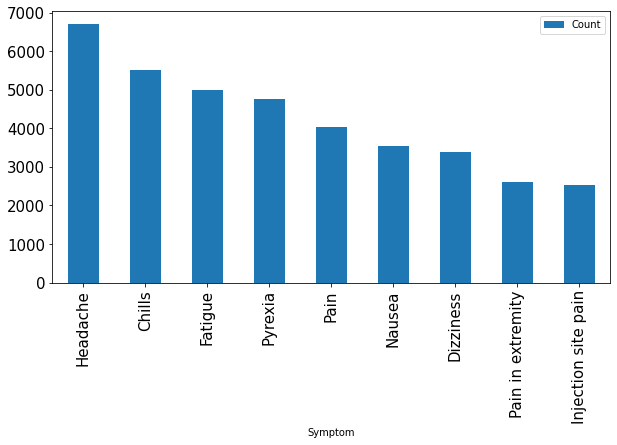

In [117]:
nsym_top9.plot(x="Symptom", y=["Count"], kind="bar",figsize=(10, 5),fontsize = 15)


# Plot the top most frequent symptom after vaccine against vaccine manufacture

In [118]:
Pfizer=df_new[df_new['VAX_MANU']=='PFIZER\BIONTECH'].reset_index(drop=True)
Pfizers=[]
for i in range(len(Pfizer)):
    Pfizers+=[Pfizer.iloc[i,0]]
    Pfizers+=[Pfizer.iloc[i,1]]   
    Pfizers+=[Pfizer.iloc[i,2]]
    Pfizers+=[Pfizer.iloc[i,3]]
    Pfizers+=[Pfizer.iloc[i,4]]
npp=(pd.DataFrame(Pfizers).value_counts()[0:20])

Moderna=df_new[df_new['VAX_MANU']=='MODERNA'].reset_index(drop=True)
Modernas=[]
for i in range(len(Moderna)):
    Modernas+=[Moderna.iloc[i,0]]
    Modernas+=[Moderna.iloc[i,1]]   
    Modernas+=[Moderna.iloc[i,2]]
    Modernas+=[Moderna.iloc[i,3]]
    Modernas+=[Moderna.iloc[i,4]]
nmo=(pd.DataFrame(Modernas).value_counts()[0:20])

Janssen=df_new[df_new['VAX_MANU']=='JANSSEN'].reset_index(drop=True)
Janssens=[]
for i in range(len(Janssen)):
    Janssens+=[Janssen.iloc[i,0]]
    Janssens+=[Janssen.iloc[i,1]]   
    Janssens+=[Janssen.iloc[i,2]]
    Janssens+=[Janssen.iloc[i,3]]
    Janssens+=[Janssen.iloc[i,4]]
nja=(pd.DataFrame(Janssens).value_counts()[0:20])

In [119]:
npp


Not_Applicable              24454
Headache                     3246
Chills                       2569
Fatigue                      2381
Pyrexia                      2143
Pain                         1923
Dizziness                    1679
Nausea                       1625
Pain in extremity            1200
Myalgia                      1093
Arthralgia                   1051
SARS-CoV-2 test positive     1032
Dyspnoea                     1014
COVID-19                      843
Asthenia                      798
Death                         752
Injection site pain           721
Rash                          692
Malaise                       682
Pruritus                      651
dtype: int64

In [120]:
nmo

Not_Applicable             23147
Headache                    2980
Chills                      2438
Fatigue                     2275
Pyrexia                     2212
Injection site erythema     1936
Pain                        1799
Injection site pain         1708
Nausea                      1707
Dizziness                   1531
Pain in extremity           1327
Injection site swelling     1244
Myalgia                     1237
Injection site pruritus     1207
Arthralgia                   975
Pruritus                     872
Erythema                     871
Injection site warmth        855
Death                        843
Dyspnoea                     839
dtype: int64

In [121]:
nja

Not_Applicable          1369
Chills                   505
Headache                 472
Pyrexia                  372
Fatigue                  314
Pain                     276
Nausea                   201
Dizziness                160
Myalgia                  134
Arthralgia                94
Injection site pain       78
Hyperhidrosis             77
Asthenia                  63
Vomiting                  60
Tremor                    57
Pain in extremity         53
Heart rate increased      45
Feeling cold              43
Diarrhoea                 36
Dyspnoea                  35
dtype: int64

In [122]:
pp=pd.DataFrame(npp)
pp.index.names = ['Symptom1']
pp.columns=['Pfizer']
pp=pp.reset_index('Symptom1')

mo=pd.DataFrame(nmo)
mo.index.names = ['Symptom1']
mo.columns=['Moderna']
mo=mo.reset_index('Symptom1')

ja=pd.DataFrame(nja)
ja.index.names = ['Symptom1']
ja.columns=['Janssen']
ja=ja.reset_index('Symptom1')

In [123]:
s1= pd.merge(pp, mo, on='Symptom1')
s2=pd.merge(s1, ja, on='Symptom1')
s2['Total']=s2['Pfizer']+s2['Moderna']+s2['Janssen']

In [124]:
s2

,Symptom1,Pfizer,Moderna,Janssen,Total
0,Not_Applicable,24454,23147,1369,48970
1,Headache,3246,2980,472,6698
2,Chills,2569,2438,505,5512
3,Fatigue,2381,2275,314,4970
4,Pyrexia,2143,2212,372,4727
5,Pain,1923,1799,276,3998
6,Dizziness,1679,1531,160,3370
7,Nausea,1625,1707,201,3533
8,Pain in extremity,1200,1327,53,2580
9,Myalgia,1093,1237,134,2464


In [125]:
s3=s2.sort_values('Total', ascending=False)
s3=s3.head(10)

In [126]:
s3

,Symptom1,Pfizer,Moderna,Janssen,Total
0,Not_Applicable,24454,23147,1369,48970
1,Headache,3246,2980,472,6698
2,Chills,2569,2438,505,5512
3,Fatigue,2381,2275,314,4970
4,Pyrexia,2143,2212,372,4727
5,Pain,1923,1799,276,3998
7,Nausea,1625,1707,201,3533
6,Dizziness,1679,1531,160,3370
8,Pain in extremity,1200,1327,53,2580
12,Injection site pain,721,1708,78,2507


In [127]:
topSymptom1=s3.iloc[1:,]
topSymptom1

,Symptom1,Pfizer,Moderna,Janssen,Total
1,Headache,3246,2980,472,6698
2,Chills,2569,2438,505,5512
3,Fatigue,2381,2275,314,4970
4,Pyrexia,2143,2212,372,4727
5,Pain,1923,1799,276,3998
7,Nausea,1625,1707,201,3533
6,Dizziness,1679,1531,160,3370
8,Pain in extremity,1200,1327,53,2580
12,Injection site pain,721,1708,78,2507


<AxesSubplot:xlabel='Symptom1'>

<Figure size 1440x720 with 0 Axes>

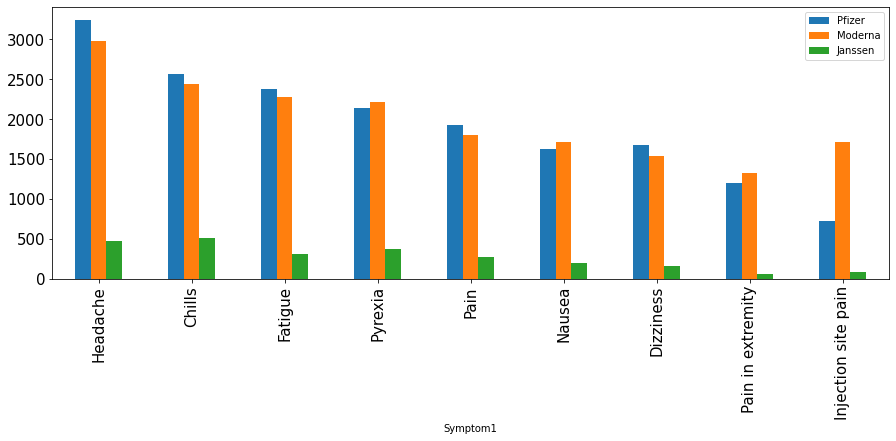

In [128]:
plt.figure(figsize=(20, 10))
topSymptom1.plot(x='Symptom1',y=["Pfizer", "Moderna","Janssen"],kind="bar",figsize=(15, 5),fontsize = 15)


# reading the data

In [129]:
df_new.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,OTHER_MEDS,HISTORY,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,Num_DIED,AGE_GROUP
0,916600,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,F,n,n,n,NaN,n,n,Y,12/28/2020,12/30/2020,2.0,n,PVT,n,n,NaN,2,01/01/2021,n,Y,n,0,Senior_Adult
1,916601,Anxiety,Dyspnoea,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,n,n,n,NaN,n,n,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,2,01/01/2021,n,Y,n,0,Senior_Citizen
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,Not_Applicable,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,F,n,n,n,NaN,n,n,U,12/31/2020,12/31/2020,0.0,NaN,SEN,n,n,NaN,2,01/01/2021,n,n,Y,0,Young_Adult
3,916603,Dizziness,Fatigue,Mobility decreased,Not_Applicable,Not_Applicable,COVID19,MODERNA,n,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,F,n,n,n,NaN,n,n,Y,12/23/2020,12/23/2020,0.0,n,WRK,n,"diverticulitis, mitral valve prolapse, osteoar...",NaN,2,01/01/2021,n,n,n,0,Senior_Adult
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,Not_Applicable,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,F,n,n,n,NaN,n,n,n,12/22/2020,12/29/2020,7.0,NaN,PUB,Na,NaN,NaN,2,01/01/2021,n,n,n,0,Senior_Adult


In [130]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48865 entries, 0 to 49020
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48865 non-null  int64  
 1   SYMPTOM1         48865 non-null  object 
 2   SYMPTOM2         48865 non-null  object 
 3   SYMPTOM3         48865 non-null  object 
 4   SYMPTOM4         48865 non-null  object 
 5   SYMPTOM5         48865 non-null  object 
 6   VAX_TYPE         48865 non-null  object 
 7   VAX_MANU         48865 non-null  object 
 8   VAX_LOT          34006 non-null  object 
 9   VAX_DOSE_SERIES  48764 non-null  object 
 10  VAX_ROUTE        37674 non-null  object 
 11  VAX_SITE         38502 non-null  object 
 12  VAX_NAME         48865 non-null  object 
 13  RECVDATE         48865 non-null  object 
 14  STATE            42055 non-null  object 
 15  AGE_YRS          48865 non-null  float64
 16  SEX              48865 non-null  object 
 17  DIED        

# HANDLING MISSING VALUES

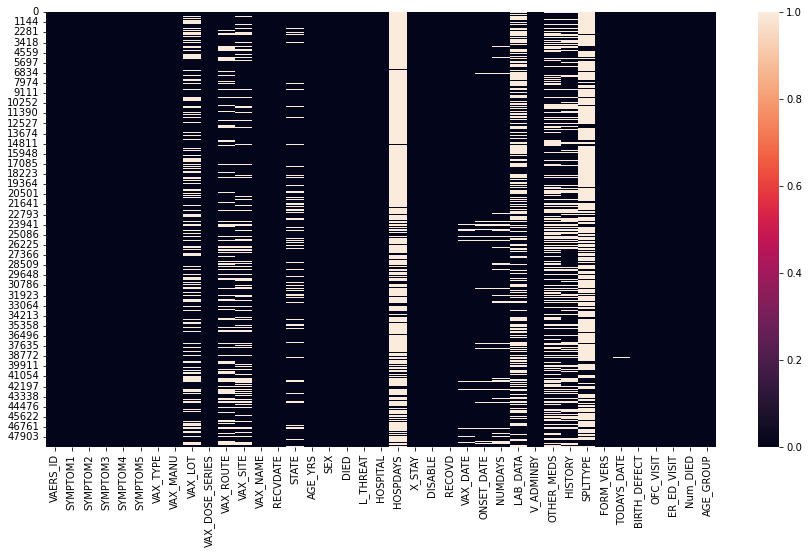

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.isnull())
plt.show()

In [132]:
df_new.isnull().sum()/len(df_new)*100

VAERS_ID            0.000000
SYMPTOM1            0.000000
SYMPTOM2            0.000000
SYMPTOM3            0.000000
SYMPTOM4            0.000000
SYMPTOM5            0.000000
VAX_TYPE            0.000000
VAX_MANU            0.000000
VAX_LOT            30.408268
VAX_DOSE_SERIES     0.206692
VAX_ROUTE          22.901873
VAX_SITE           21.207408
VAX_NAME            0.000000
RECVDATE            0.000000
STATE              13.936355
AGE_YRS             0.000000
SEX                 0.000000
DIED                0.000000
L_THREAT            0.000000
HOSPITAL            0.000000
HOSPDAYS           86.806508
X_STAY              0.000000
DISABLE             0.000000
RECOVD              0.000000
VAX_DATE            3.581295
ONSET_DATE          4.420342
NUMDAYS             7.698762
LAB_DATA           48.036427
V_ADMINBY           0.000000
OTHER_MEDS         36.156758
HISTORY            30.031720
SPLTTYPE           77.028548
FORM_VERS           0.000000
TODAYS_DATE         0.579147
BIRTH_DEFECT  

In [133]:
from sklearn.impute import SimpleImputer


In [134]:
df_num = df_new.select_dtypes(np.number)
df_cat = df_new.select_dtypes('O')

In [135]:
sim1 = SimpleImputer(strategy = 'median')
sim2 = SimpleImputer(strategy = 'most_frequent')

df_num = pd.DataFrame(sim1.fit_transform(df_num), columns = df_num.columns)
print(df_num.isnull().sum())

df_cat = pd.DataFrame(sim2.fit_transform(df_cat), columns = df_cat.columns)
print(df_cat.isnull().sum())

# no null value is present the dataset now.

VAERS_ID     0
AGE_YRS      0
HOSPDAYS     0
NUMDAYS      0
FORM_VERS    0
Num_DIED     0
dtype: int64
SYMPTOM1           0
SYMPTOM2           0
SYMPTOM3           0
SYMPTOM4           0
SYMPTOM5           0
VAX_TYPE           0
VAX_MANU           0
VAX_LOT            0
VAX_DOSE_SERIES    0
VAX_ROUTE          0
VAX_SITE           0
VAX_NAME           0
RECVDATE           0
STATE              0
SEX                0
DIED               0
L_THREAT           0
HOSPITAL           0
X_STAY             0
DISABLE            0
RECOVD             0
VAX_DATE           0
ONSET_DATE         0
LAB_DATA           0
V_ADMINBY          0
OTHER_MEDS         0
HISTORY            0
SPLTTYPE           0
TODAYS_DATE        0
BIRTH_DEFECT       0
OFC_VISIT          0
ER_ED_VISIT        0
AGE_GROUP          0
dtype: int64


# outlier treatment


In [136]:
df_num.head()

,VAERS_ID,AGE_YRS,HOSPDAYS,NUMDAYS,FORM_VERS,Num_DIED
0,916600.0,33.0,3.0,2.0,2.0,0.0
1,916601.0,73.0,3.0,0.0,2.0,0.0
2,916602.0,23.0,3.0,0.0,2.0,0.0
3,916603.0,58.0,3.0,0.0,2.0,0.0
4,916604.0,47.0,3.0,7.0,2.0,0.0


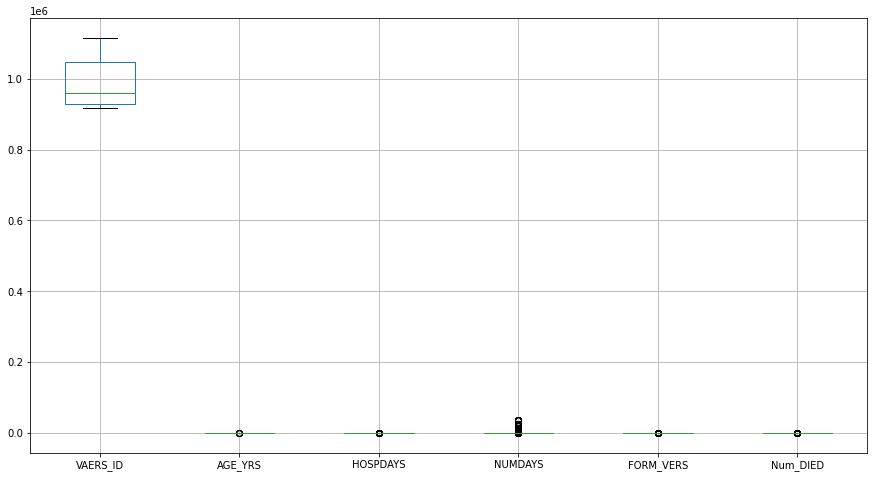

In [137]:
plt.figure(figsize=(15,8))
df_num.boxplot()
plt.show()

#VAERS ID IS INSIGNIFICant droping it below

#NUm_died is target variable, converting it to 'object'daatype below

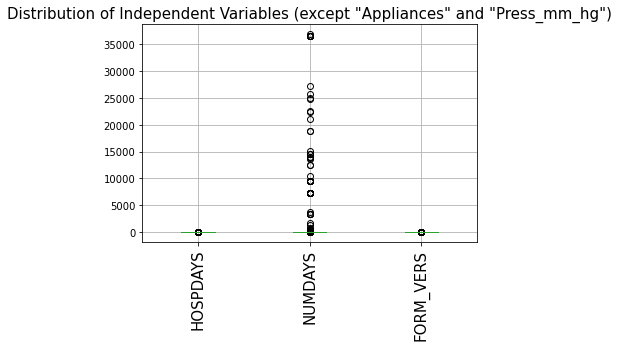

In [138]:
df_num.iloc[:,[2,3,4]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables , fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()






# REMOVING INSIGNIFICANT FEATURES

In [139]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48865 entries, 0 to 48864
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VAERS_ID   48865 non-null  float64
 1   AGE_YRS    48865 non-null  float64
 2   HOSPDAYS   48865 non-null  float64
 3   NUMDAYS    48865 non-null  float64
 4   FORM_VERS  48865 non-null  float64
 5   Num_DIED   48865 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


In [140]:
df_target= df_num['Num_DIED'].astype('O')

In [141]:
df_target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Num_DIED, dtype: object

In [142]:
df_num= df_num.drop(['VAERS_ID','FORM_VERS','Num_DIED'], axis=1)
df_num.head()

,AGE_YRS,HOSPDAYS,NUMDAYS
0,33.0,3.0,2.0
1,73.0,3.0,0.0
2,23.0,3.0,0.0
3,58.0,3.0,0.0
4,47.0,3.0,7.0


In [143]:
df_cat= df_cat.drop(['X_STAY','OFC_VISIT','VAX_ROUTE','VAX_SITE','VAX_DOSE_SERIES','VAX_NAME','STATE',
                    'RECVDATE','VAX_DATE','ONSET_DATE','LAB_DATA','V_ADMINBY','BIRTH_DEFECT','TODAYS_DATE'],axis=1)


In [144]:
#SPLTTYPE-irr

#X_STAY- same as
#OFC_VISIT  - irr    
#VAX_LOT(lot number)
#VAX_ROUTE
#VAX_SITE
#VAX_DOSE_SERIES
#VAX_NAME
#STATE
#RECVDATE
#VAX_DATE
#ONSET_DATE
#LAB_DATA
#V_ADMINBY
#BIRTH_DEFECT- same as history
#TODAYS_DATE

In [145]:
df_cat=df_cat.drop(['SPLTTYPE'], axis=1)


In [146]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48865 entries, 0 to 48864
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SYMPTOM1     48865 non-null  object
 1   SYMPTOM2     48865 non-null  object
 2   SYMPTOM3     48865 non-null  object
 3   SYMPTOM4     48865 non-null  object
 4   SYMPTOM5     48865 non-null  object
 5   VAX_TYPE     48865 non-null  object
 6   VAX_MANU     48865 non-null  object
 7   VAX_LOT      48865 non-null  object
 8   SEX          48865 non-null  object
 9   DIED         48865 non-null  object
 10  L_THREAT     48865 non-null  object
 11  HOSPITAL     48865 non-null  object
 12  DISABLE      48865 non-null  object
 13  RECOVD       48865 non-null  object
 14  OTHER_MEDS   48865 non-null  object
 15  HISTORY      48865 non-null  object
 16  ER_ED_VISIT  48865 non-null  object
 17  AGE_GROUP    48865 non-null  object
dtypes: object(18)
memory usage: 6.7+ MB


In [147]:
df_cat.tail()

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,SEX,DIED,L_THREAT,HOSPITAL,DISABLE,RECOVD,OTHER_MEDS,HISTORY,ER_ED_VISIT,AGE_GROUP
48860,Nasal discomfort,Night sweats,Platelet count,Platelet count decreased,Pyrexia,COVID19,PFIZER\BIONTECH,n,F,n,n,n,n,Y,ELIQUIS; SYNTHROID; PRAVASTATIN; DILTIAZEM; DO...,Medical History/Concurrent Conditions: Atrial ...,n,Senior_Citizen
48861,Rash,SARS-CoV-2 test,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,PFIZER\BIONTECH,n,F,n,n,n,n,Y,ELIQUIS; SYNTHROID; PRAVASTATIN; DILTIAZEM; DO...,Medical History/Concurrent Conditions: Atrial ...,n,Senior_Citizen
48862,Haemophagocytic lymphohistiocytosis,SARS-CoV-2 test,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,PFIZER\BIONTECH,EL9264,F,Y,n,n,n,n,n,Medical History/Concurrent Conditions: Type II...,n,Senior_Adult
48863,Death,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,039K20A,M,Y,n,n,n,n,n,Medical History/Concurrent Conditions: No adve...,n,Senior_Adult
48864,Death,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,026A21A,F,Y,n,n,n,n,n,Comments: List of non-encoded Patient Relevant...,n,Senior_Citizen


# BALANCING THE TARGET VARIABLE

In [148]:
df_new['Num_DIED'].value_counts()

0    45844
1     3021
Name: Num_DIED, dtype: int64

In [149]:
df_new['Num_DIED'].value_counts()/len(df_new)*100

0    93.817661
1     6.182339
Name: Num_DIED, dtype: float64

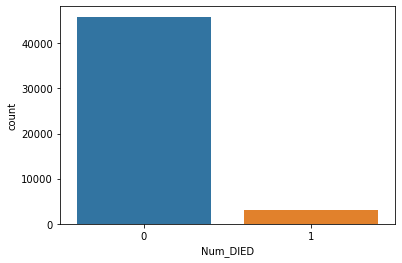

In [150]:
#we can visualize using countplot also

sns.countplot(df_new['Num_DIED'])
plt.show()


#Traget is imbalanced

In [151]:
#We have to make our target variable balanced using sampling techniques
#SPLITTING TRAIN AND TEST DATA
x=df_new.drop(['Num_DIED','DIED'],axis=1)
x_num=df_new.select_dtypes(np.number)
x_num.head()



,VAERS_ID,AGE_YRS,HOSPDAYS,NUMDAYS,FORM_VERS,Num_DIED
0,916600,33.0,NaN,2.0,2,0
1,916601,73.0,NaN,0.0,2,0
2,916602,23.0,NaN,0.0,2,0
3,916603,58.0,NaN,0.0,2,0
4,916604,47.0,NaN,7.0,2,0


In [152]:
x_cat = df_new.select_dtypes('O')
x_cat.head()

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,SEX,DIED,L_THREAT,HOSPITAL,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,LAB_DATA,V_ADMINBY,OTHER_MEDS,HISTORY,SPLTTYPE,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,AGE_GROUP
0,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,F,n,n,n,n,n,Y,12/28/2020,12/30/2020,n,PVT,n,n,NaN,01/01/2021,n,Y,n,Senior_Adult
1,Anxiety,Dyspnoea,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,F,n,n,n,n,n,Y,12/31/2020,12/31/2020,NaN,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,01/01/2021,n,Y,n,Senior_Citizen
2,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,Not_Applicable,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,F,n,n,n,n,n,U,12/31/2020,12/31/2020,NaN,SEN,n,n,NaN,01/01/2021,n,n,Y,Young_Adult
3,Dizziness,Fatigue,Mobility decreased,Not_Applicable,Not_Applicable,COVID19,MODERNA,n,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,F,n,n,n,n,n,Y,12/23/2020,12/23/2020,n,WRK,n,"diverticulitis, mitral valve prolapse, osteoar...",NaN,01/01/2021,n,n,n,Senior_Adult
4,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,Not_Applicable,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,F,n,n,n,n,n,n,12/22/2020,12/29/2020,NaN,PUB,Na,NaN,NaN,01/01/2021,n,n,n,Senior_Adult


In [153]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [154]:
import category_encoders as ce

In [155]:
df_new.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,OTHER_MEDS,HISTORY,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,Num_DIED,AGE_GROUP
0,916600,Dysphagia,Epiglottitis,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,F,n,n,n,NaN,n,n,Y,12/28/2020,12/30/2020,2.0,n,PVT,n,n,NaN,2,01/01/2021,n,Y,n,0,Senior_Adult
1,916601,Anxiety,Dyspnoea,Not_Applicable,Not_Applicable,Not_Applicable,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,n,n,n,NaN,n,n,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,2,01/01/2021,n,Y,n,0,Senior_Citizen
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,Not_Applicable,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,F,n,n,n,NaN,n,n,U,12/31/2020,12/31/2020,0.0,NaN,SEN,n,n,NaN,2,01/01/2021,n,n,Y,0,Young_Adult
3,916603,Dizziness,Fatigue,Mobility decreased,Not_Applicable,Not_Applicable,COVID19,MODERNA,n,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,F,n,n,n,NaN,n,n,Y,12/23/2020,12/23/2020,0.0,n,WRK,n,"diverticulitis, mitral valve prolapse, osteoar...",NaN,2,01/01/2021,n,n,n,0,Senior_Adult
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,Not_Applicable,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,F,n,n,n,NaN,n,n,n,12/22/2020,12/29/2020,7.0,NaN,PUB,Na,NaN,NaN,2,01/01/2021,n,n,n,0,Senior_Adult


In [156]:
df_target = df_cat.DIED.copy()
df_target = pd.DataFrame(df_target,columns=['DIED'])


In [157]:
df_target.replace({'n':0,'Y':1},inplace=True)
df_cat.drop('DIED',axis=1,inplace=True)

In [158]:
encoder = ce.WOEEncoder(cols=df_cat.columns,random_state=10)
df_cat_num = encoder.fit_transform(df_cat,df_target)

In [159]:
df_cat_num.head()

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,SEX,L_THREAT,HOSPITAL,DISABLE,RECOVD,OTHER_MEDS,HISTORY,ER_ED_VISIT,AGE_GROUP
0,-0.381054,0.000000,0.243075,0.074102,-0.013727,-0.008328,0.003276,-0.457713,-0.555775,0.025051,-0.050271,0.03362,-5.616693,-0.06568,-0.428351,-0.075033,-1.368446
1,-0.894878,0.559554,0.243075,0.074102,-0.013727,-0.008328,0.003276,-0.339175,-0.555775,0.025051,-0.050271,0.03362,-5.616693,0.00000,0.000000,-0.075033,1.073091
2,-2.213035,-0.313508,-1.761135,0.154089,-0.013727,-0.008328,0.025215,-0.837408,-0.555775,0.025051,-0.050271,0.03362,-0.522487,-0.06568,-0.428351,0.243539,-2.999815
3,-3.178802,-1.905935,0.024411,0.074102,-0.013727,-0.008328,0.003276,1.201974,-0.555775,0.025051,-0.050271,0.03362,-5.616693,-0.06568,0.000000,-0.075033,-1.368446
4,-4.537259,-3.621321,-3.657689,-3.262376,-0.013727,-0.008328,0.003276,-0.272604,-0.555775,0.025051,-0.050271,0.03362,0.795991,-0.05355,-0.428351,-0.075033,-1.368446


In [160]:
df_main = pd.concat([df_cat_num,df_num,df_target], axis=1)
df_main.DIED.value_counts()

0    45844
1     3021
Name: DIED, dtype: int64

In [161]:
df_main.head()

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,SEX,L_THREAT,HOSPITAL,DISABLE,RECOVD,OTHER_MEDS,HISTORY,ER_ED_VISIT,AGE_GROUP,AGE_YRS,HOSPDAYS,NUMDAYS,DIED
0,-0.381054,0.000000,0.243075,0.074102,-0.013727,-0.008328,0.003276,-0.457713,-0.555775,0.025051,-0.050271,0.03362,-5.616693,-0.06568,-0.428351,-0.075033,-1.368446,33.0,3.0,2.0,0
1,-0.894878,0.559554,0.243075,0.074102,-0.013727,-0.008328,0.003276,-0.339175,-0.555775,0.025051,-0.050271,0.03362,-5.616693,0.00000,0.000000,-0.075033,1.073091,73.0,3.0,0.0,0
2,-2.213035,-0.313508,-1.761135,0.154089,-0.013727,-0.008328,0.025215,-0.837408,-0.555775,0.025051,-0.050271,0.03362,-0.522487,-0.06568,-0.428351,0.243539,-2.999815,23.0,3.0,0.0,0
3,-3.178802,-1.905935,0.024411,0.074102,-0.013727,-0.008328,0.003276,1.201974,-0.555775,0.025051,-0.050271,0.03362,-5.616693,-0.06568,0.000000,-0.075033,-1.368446,58.0,3.0,0.0,0
4,-4.537259,-3.621321,-3.657689,-3.262376,-0.013727,-0.008328,0.003276,-0.272604,-0.555775,0.025051,-0.050271,0.03362,0.795991,-0.05355,-0.428351,-0.075033,-1.368446,47.0,3.0,7.0,0


In [162]:
X = df_main.drop(['DIED','VAX_LOT'],axis=1)
y = df_main['DIED']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10 ,test_size=0.30)

from imblearn.over_sampling import SMOTE
sm1 =SMOTE(random_state= 100)
X_train_res,y_train_res = sm1.fit_resample(X_train,y_train.ravel())

In [164]:
y_train_res = pd.DataFrame(y_train_res,columns=['DIED'])
y_train_res.value_counts()

#now our target variable is balanced


DIED
0       32095
1       32095
dtype: int64

# LOGISTIC REGRESSION


In [165]:
from sklearn.linear_model import LogisticRegression
logreg1=LogisticRegression()
logreg1.fit(X_train_res,y_train_res)
print(logreg1.score(X_test,y_test))

y_pred = logreg1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



0.9489085948158253
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13749
           1       0.55      0.95      0.70       911

    accuracy                           0.95     14660
   macro avg       0.77      0.95      0.83     14660
weighted avg       0.97      0.95      0.96     14660



In [166]:
# # base model has a accuracy of 0.95 which is good

In [167]:
import statsmodels
import statsmodels.api as sm

logreg1 = sm.Logit(y_train_res, X_train_res).fit()

# print the summary of the model
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.101812
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   DIED   No. Observations:                64190
Model:                          Logit   Df Residuals:                    64171
Method:                           MLE   Df Model:                           18
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                  0.8531
Time:                        22:57:11   Log-Likelihood:                -6535.3
converged:                       True   LL-Null:                       -44493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SYMPTOM1        0.8619      0.014     60.726      0.000       0.834       0.890
SYMPTOM2        0.7522   

In [168]:
#  'ER_ED_VISIT' has a p_value of greter than 0.05 so it is not that much significance in the model

In [169]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=40)
ada.fit(X_train_res,y_train_res)
print(ada.score(X_test,y_test))

y_pred1 = ada.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

0.9874488403819918
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13749
           1       0.87      0.94      0.90       911

    accuracy                           0.99     14660
   macro avg       0.93      0.96      0.95     14660
weighted avg       0.99      0.99      0.99     14660



In [170]:
# all four looks same as privious but the accuracy has increased in adaboost full model.

roc score for logistic model 0.9476500795707006
roc score for adaboost model 0.9646096604650781


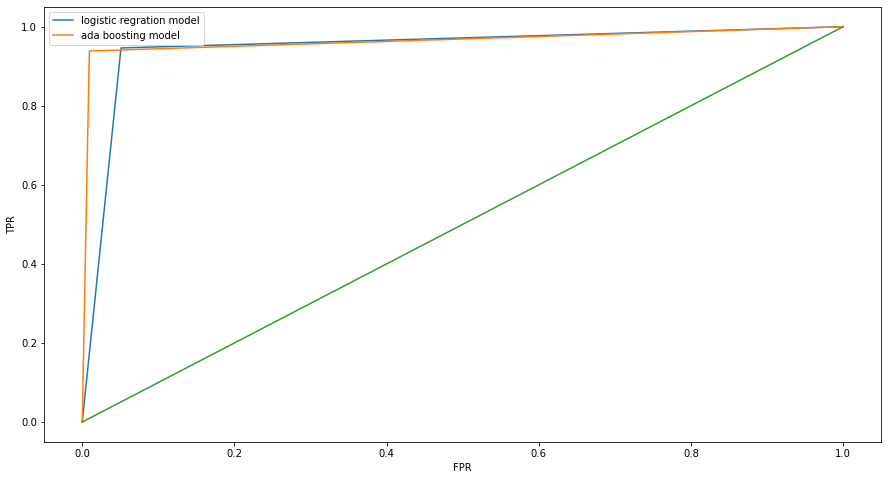

In [171]:
from sklearn.metrics import roc_curve,roc_auc_score
print("roc score for logistic model",roc_auc_score(y_test,y_pred))
print("roc score for adaboost model",roc_auc_score(y_test,y_pred1))
fpr, tpr, th = roc_curve(y_test,y_pred)
fpr1, tpr1, th1 = roc_curve(y_test,y_pred1)

plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label = 'logistic regration model')
plt.plot(fpr1, tpr1, label = 'ada boosting model')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [172]:
# ada boost full model is better than base model.

# FEATURE SELECTION WITH RFE

In [173]:
from sklearn.feature_selection import RFE
n_features_list = list(range(1, 17))
score =[]
for n_features in range(1, 17):
    logreg = LogisticRegression()
    rfe_n = RFE(estimator=logreg, n_features_to_select=n_features)
    rfe_n.fit(X_train_res, y_train_res)
    col_n = X_train_res.columns[rfe_n.support_]
    X_train_rfe_n = X_train_res[col_n]
    X_test_rfe_n = X_test[col_n]
    lo = logreg.fit(X_train_rfe_n,y_train_res)
    s = lo.score(X_test_rfe_n,y_test)
    score.append(s)

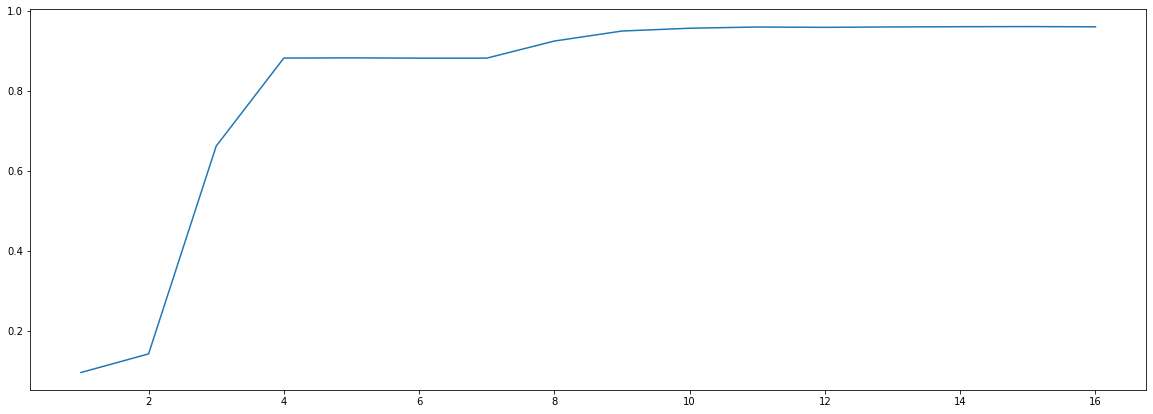

In [174]:
import matplotlib.ticker as plticker
plt.figure(figsize=(20,7))
plt.plot(n_features_list,score)
plt.show()

In [175]:
# arround n=11 the line became saturated, so we can take number of features for rfe as 11, as after 11 there 
# will not be much of a change in accuracy after that.

In [176]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select= 11)
rfe.fit(X_train_res, y_train_res)
col = X_train_res.columns[rfe.support_]
print("Important features ", col)

X_train_11= X_train_res[col]
X_test_11 = X_test[col]

Important features  Index(['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'VAX_TYPE', 'VAX_MANU', 'L_THREAT',
       'HOSPITAL', 'DISABLE', 'RECOVD', 'HISTORY', 'AGE_GROUP'],
      dtype='object')


In [177]:
## Model with 11 features.

logreg2=LogisticRegression()
logreg2.fit(X_train_11,y_train_res)
print(logreg2.score(X_test_11,y_test))

y_pred2 = logreg2.predict(X_test_11)

0.9598908594815826


In [178]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score


print("f1 score:-",f1_score(y_test, y_pred2))
print("Precision score:-",precision_score(y_test, y_pred2))
print("Recall score:-",recall_score(y_test, y_pred2))

f1 score:- 0.7441253263707571
Precision score:- 0.6164383561643836
Recall score:- 0.9385290889132821


In [179]:
# the f1 score near abou 1 which is good but can be improved.
# precision score is less, but can be improved.
# recall score looks good.

roc score for logistic model 0.9476500795707006
roc score for logistic model with 11 features 0.9499176828667072


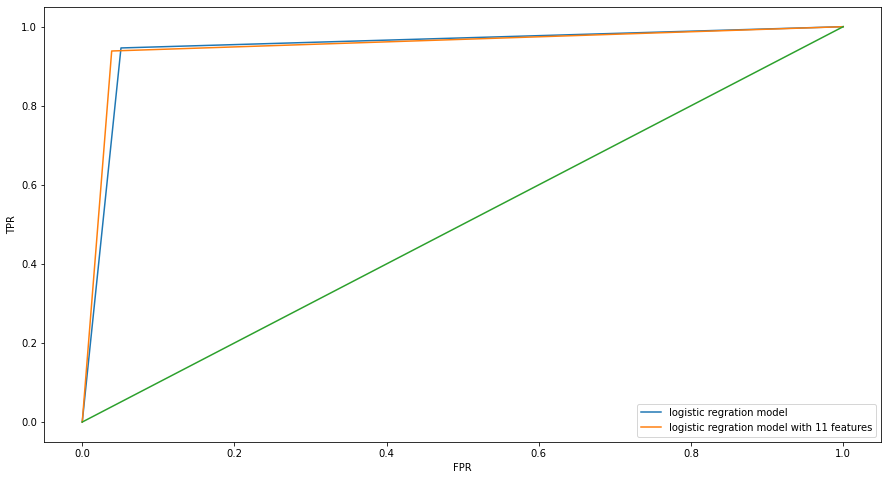

In [180]:
print("roc score for logistic model",roc_auc_score(y_test,y_pred))
print("roc score for logistic model with 11 features",roc_auc_score(y_test,y_pred2))
fpr, tpr, th = roc_curve(y_test,y_pred)
fpr2, tpr2, th2 = roc_curve(y_test,y_pred2)

plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label = 'logistic regration model')
plt.plot(fpr2, tpr2, label = 'logistic regration model with 11 features')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [181]:
# over all per formance of the model improved after feature selection

## Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100, criterion='entropy', max_depth=15, min_samples_leaf=10)
dt_model=dt.fit(X_train_11, y_train_res)
y_train_pred1=dt_model.predict(X_train_11)
y_test_pred1=dt_model.predict(X_test_11)
print(dt_model.score(X_test_11,y_test))

acc_table=classification_report(y_train_res,y_train_pred1)
print("Decision Tree Train classification")
print(acc_table)

0.9841746248294679
Decision Tree Train classification
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     32095
           1       0.99      0.99      0.99     32095

    accuracy                           0.99     64190
   macro avg       0.99      0.99      0.99     64190
weighted avg       0.99      0.99      0.99     64190



In [183]:
# the accuracy and the overall performance has improved.

## Hyper parameter tuning for random forest

In [184]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


params = { 'n_estimators': [90, 100, 150, 200],
'max_depth': [10, 15, 20]}


grid1 = GridSearchCV(RandomForestClassifier(), params)
grid1.fit(X_train_11, y_train_res)




print(grid1.best_params_)
best_rf = grid1.best_estimator_
print(best_rf)

{'max_depth': 20, 'n_estimators': 150}
RandomForestClassifier(max_depth=20, n_estimators=150)


In [215]:
rf =  RandomForestClassifier(n_estimators=150,max_depth=20,random_state=10) # model with best parameters
rf.fit(X_train_11, y_train_res)
print(rf.score(X_test_11,y_test))

y_pred3 = rf.predict(X_test_11)
print(classification_report(y_test,y_pred3))

0.9907912687585266
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13749
           1       0.92      0.93      0.93       911

    accuracy                           0.99     14660
   macro avg       0.96      0.96      0.96     14660
weighted avg       0.99      0.99      0.99     14660



In [216]:
# for the test set the accuracy is 99.06% 

Roc score for randomforest:  0.963829202546933
Roc score for logistic regration model with 11 features:  0.9499176828667072


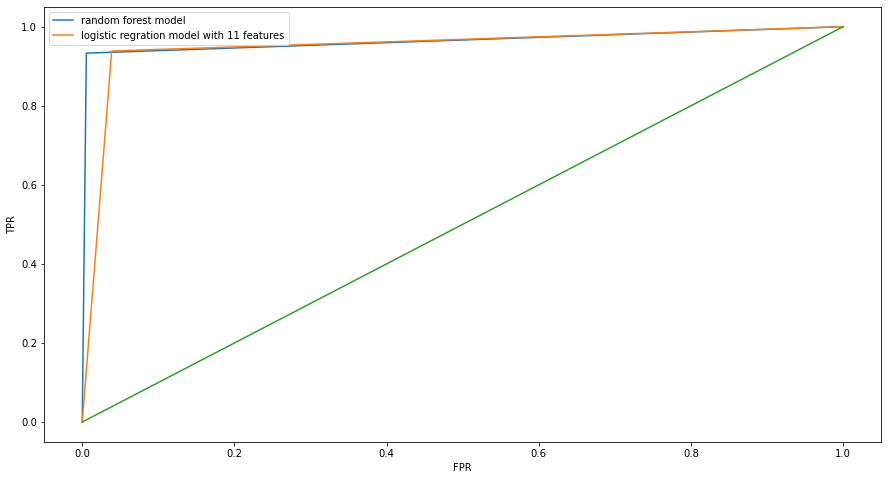

In [217]:
print("Roc score for randomforest: ",roc_auc_score(y_test,y_pred3))
print("Roc score for logistic regration model with 11 features: ",roc_auc_score(y_test,y_pred2))
fpr3, tpr3, th = roc_curve(y_test,y_pred3)
fpr2, tpr2, th2 = roc_curve(y_test,y_pred2)

plt.figure(figsize=(15,8))
plt.plot(fpr3, tpr3, label = 'random forest model')
plt.plot(fpr2, tpr2, label = 'logistic regration model with 11 features')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [218]:
# the overall model in random forest has been improved than logistic regration.

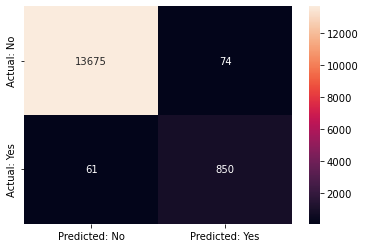

In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [220]:
# some false prediction do exists

In [221]:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = X_test_11.columns
feat_imp['Score'] = rf.feature_importances_
feat_imp.sort_values(by = 'Score', ascending = False)

,Feature,Score
0,SYMPTOM1,0.327929
8,RECOVD,0.151912
9,HISTORY,0.150365
1,SYMPTOM2,0.131745
10,AGE_GROUP,0.086279
2,SYMPTOM3,0.079679
6,HOSPITAL,0.031607
4,VAX_MANU,0.022085
7,DISABLE,0.010001
5,L_THREAT,0.007732


In [222]:
# 'SYMPTOM1' has the maximum importance and 'VAX_TYPE' has the minimum importance

In [223]:
y_pred3_train = rf.predict(X_train_11)
print("f1 score:-",f1_score(y_train_res, y_pred3_train))
print("Precision score:-",precision_score(y_train_res, y_pred3_train))
print("Recall score:-",recall_score(y_train_res, y_pred3_train))

f1 score:- 0.998971482000935
Precision score:- 0.9992829306313328
Recall score:- 0.9986602274497586


In [224]:
# all score looks good.

In [225]:
print("f1 score:-",f1_score(y_test, y_pred3))
print("Precision score:-",precision_score(y_test, y_pred3))
print("Recall score:-",recall_score(y_test, y_pred3))

f1 score:- 0.9264305177111717
Precision score:- 0.9199134199134199
Recall score:- 0.9330406147091108


In [226]:
# now we can see there some difference in test and test score is present but that is very small and we can say the model is 
# almost perfect fit.

# ADA Boosting

In [197]:
ada_model = AdaBoostClassifier(n_estimators = 50, random_state = 10)
ada_model.fit(X_train_11, y_train_res)

print(ada_model.score(X_test_11, y_test))
y_pred5 = ada_model.predict(X_test_11)
print(classification_report(y_test,y_pred5))

0.9863574351978172
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13749
           1       0.87      0.92      0.89       911

    accuracy                           0.99     14660
   macro avg       0.93      0.96      0.94     14660
weighted avg       0.99      0.99      0.99     14660



In [198]:
# accuracy  of the model is 98.6% which is very high. But it is less than random forest model.

In [199]:
print("f1 score:-",f1_score(y_test, y_pred5))
print("Precision score:-",precision_score(y_test, y_pred5))
print("Recall score:-",recall_score(y_test, y_pred5))

f1 score:- 0.8933901918976546
Precision score:- 0.8683937823834197
Recall score:- 0.9198682766190999


In [200]:
# all the scores are very nare to 1 which is good.

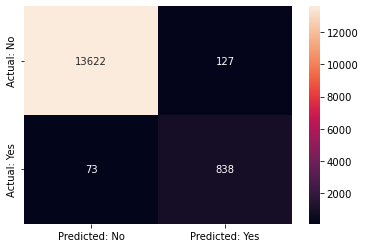

In [201]:
cm = confusion_matrix(y_test, y_pred5)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [202]:
# false prediction is more than random forest model.

Roc score for randomforest:  0.9632439888453318
Roc score for adaboost:  0.955315620599171


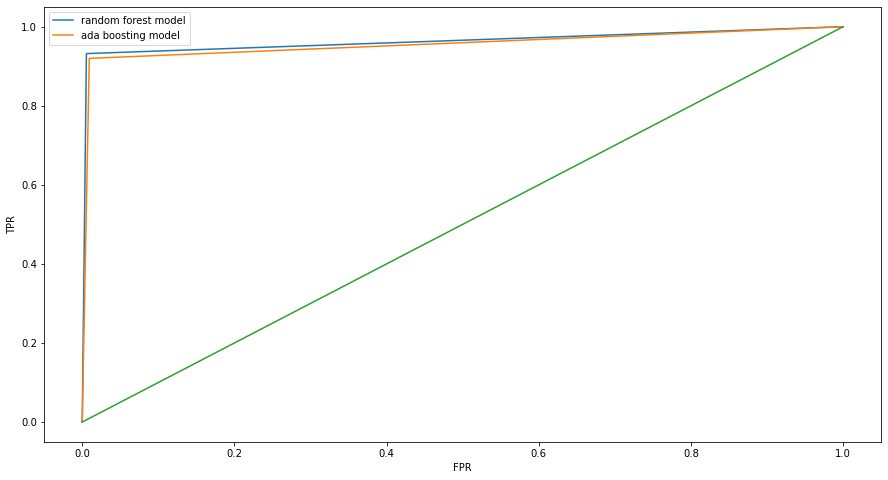

In [203]:
print("Roc score for randomforest: ",roc_auc_score(y_test,y_pred3))
print("Roc score for adaboost: ",roc_auc_score(y_test,y_pred5))


fpr3, tpr3, th3 = roc_curve(y_test,y_pred3)
fpr5, tpr5, th5 = roc_curve(y_test,y_pred5)

plt.figure(figsize=(15,8))
plt.plot(fpr3, tpr3, label = 'random forest model')
plt.plot(fpr5, tpr5, label = 'ada boosting model')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [204]:
# from the roc curve we can see that random forest is better than ada boosting 

# Gradient Boosting

In [243]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 350,max_depth= 4,learning_rate=0.1)
gb.fit(X_train_11, y_train_res)


gb.score(X_test_11, y_test)

0.9915416098226466

In [244]:
y_pred4 = gb.predict(X_test_11)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13749
           1       0.93      0.93      0.93       911

    accuracy                           0.99     14660
   macro avg       0.96      0.96      0.96     14660
weighted avg       0.99      0.99      0.99     14660



Roc score for randomforest:  0.963829202546933
Roc score for gradientboosting:  0.962691788222259


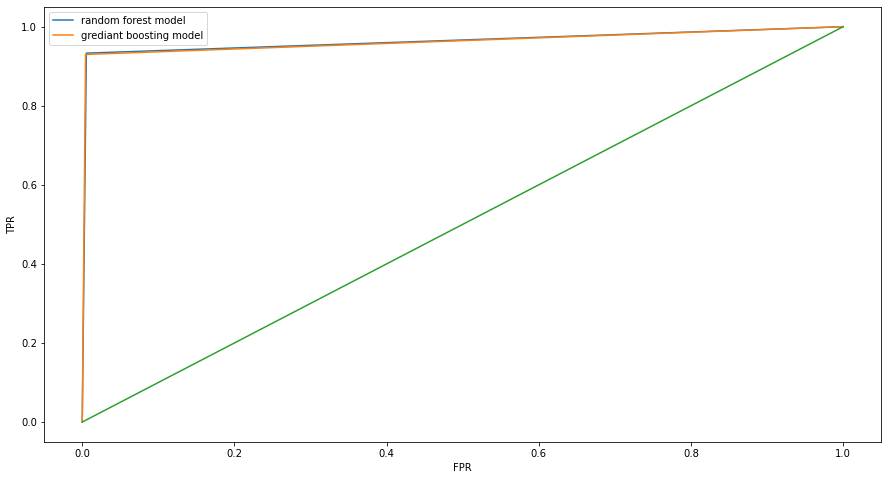

In [245]:
print("Roc score for randomforest: ",roc_auc_score(y_test,y_pred3))
print("Roc score for gradientboosting: ",roc_auc_score(y_test,y_pred4))


fpr3, tpr3, th3 = roc_curve(y_test,y_pred3)
fpr4, tpr4, th4 = roc_curve(y_test,y_pred4)

plt.figure(figsize=(15,8))
plt.plot(fpr3, tpr3, label = 'random forest model')
plt.plot(fpr4, tpr4, label = 'grediant boosting model')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [208]:
# from the roc curve we can see that random forest model and gradiant boosting model are almost same.

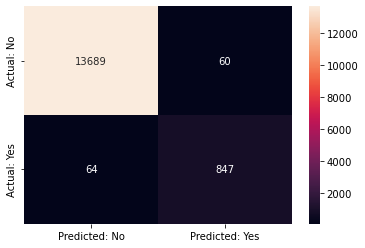

In [246]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred4)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [210]:
# we can see that there is some false prediction present in the prediction. but it is very less compare to true prediction 
# values.

In [247]:
print("f1 score:-",f1_score(y_test, y_pred4))
print("Precision score:-",precision_score(y_test, y_pred4))
print("Recall score:-",recall_score(y_test, y_pred4))

f1 score:- 0.9317931793179318
Precision score:- 0.9338478500551268
Recall score:- 0.9297475301866082


In [212]:
# f1 score is almost 1 which is good. It is also similar as random forest.
# pricision sore also looks good
# recall value is very near to 1.

In [227]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [234]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,learning_rate= 0.1,gamma = 2)
xgb.fit(X_train_11, y_train_res)
y_pred6 = xgb.predict(X_test_11)

xgb.score(X_test_11, y_test)

0.9899727148703956

Roc score for xg boost:  0.9639052883119572
Roc score for gradientboosting:  0.9621429408018418


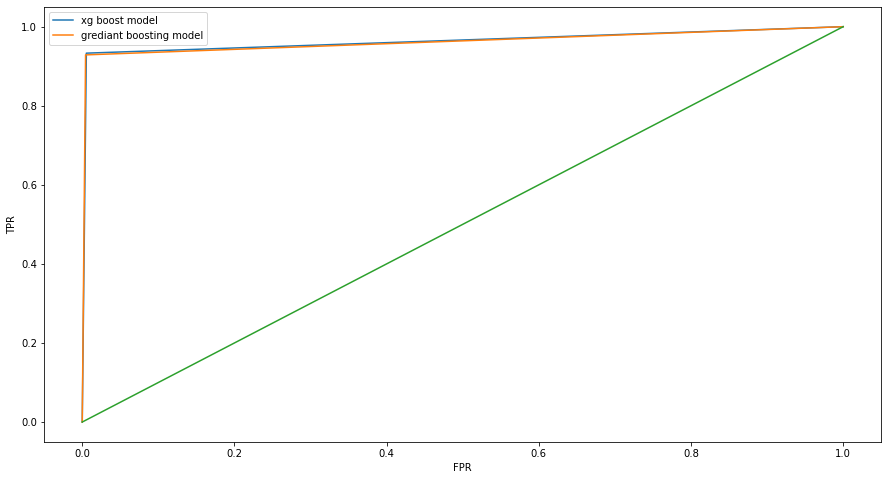

In [235]:
print("Roc score for xg boost: ",roc_auc_score(y_test,y_pred6))
print("Roc score for gradientboosting: ",roc_auc_score(y_test,y_pred4))


fpr6, tpr6, th6 = roc_curve(y_test,y_pred6)
fpr4, tpr4, th4 = roc_curve(y_test,y_pred4)

plt.figure(figsize=(15,8))
plt.plot(fpr3, tpr3, label = 'xg boost model')
plt.plot(fpr4, tpr4, label = 'grediant boosting model')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

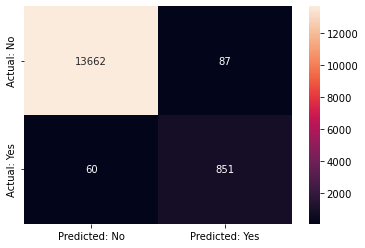

In [236]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred6)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [237]:
print("f1 score:-",f1_score(y_test, y_pred6))
print("Precision score:-",precision_score(y_test, y_pred6))
print("Recall score:-",recall_score(y_test, y_pred6))

f1 score:- 0.9204975662520282
Precision score:- 0.9072494669509595
Recall score:- 0.9341383095499451


In [213]:
# From the above comparison between parameters of different models we can say Gradient Boosting model and Random Forest model 
# are giving almost same performance. But for Gradient Boosting model the f1 score is slightly better than Random Forest.

In [214]:
## Conclusion:-
# In the healthcare sector, a huge amount of data is generated continuously and this data can be used to extract 
# meaningful information. Through our project we have tried to predict if someone is going to die from the side effect of the 
# Covid-19 Vaccination. We have made a good quality model for this purpous which can predict this.
# Although we have some wrong prediction while testing but that is well under the limit and most of the prediction were correct.
# So through our model we can actually predict if someone's life is at resk due to the ill effect of vaccination and we can 
# start to treat him or her accordingly before hand to save their lives.

The references can be blogs, articles or even social media news relevant to explain the importance of the projects.


https://www.kaggle.com/datasets/ayushggarg/covid19-vaccine-adverse-reactions